## Jiang, et al - Gene Analysis of Progenitor Cell RNASeq Data
### Normal Control (Aged and Young) vs. Myeloproliferative Neoplasms (MPN) 

* Aged bone marrow: 'X368_ACAGTG_S0', 'X380_ACAGTG_S0', 'X401_ACAGTG_S0', 'X402_ACAGTG_S0', 'X410_ACAGTG_S0', 'X415_ACAGTG_S0', 'X416_ACAGTG_S0', 'X426_ACAGTG_S0' 
* Young bone marrow: 'X4279.BM.Prog', 'X4259.BM.Prog', 'X4215.BM.Prog', 'X4188.BM.Prog', 'X4066.BM.Prog', 'X4018.BM.Prog', 'X4040.BM.Prog', 'X4218.BM.Prog'
* PV: 'X598.PB.Prog_S0', 'X575A.PB.Prog_S0', 'X562.PB.Prog_S0', 'X662.BM.Prog_S4', 'X690.BM.Prog_S5', 'X689.BM.Prog_S11'
* Essential Thrombocythemia (ET): 'X431.PB.Prog', 'X638.BM.Prog' 
* Myelofibrosis (MF): 'X724.PB.Prog_S3', 'X668.PB.Prog_S2', 'X736.BM.Prog_S0', 'X600.PB.Prog', 'X732.PB.Prog', 'X580.BM.Prog', 'X664.BM.Prog', 'X428.PB.Prog', 'X725.PB.Prog', 'X566.PB.Prog', 'X600.BM.Prog', 'X407.PB.Prog', 'X569.PB.Prog', 'X581.PB.Prog', 'X599.PB.Prog', 'X621.PB.Prog', 'X767.BM.Prog', 'X744.PB.Prog', 'X560.PB.Prog', 'X576.PB.Prog', 'X573.BM.Prog', 'X670A.PB.Prog', 'X670B.PB.Prog', 'X666.PB.Prog'
* Chronic Myeloid Leukemia (CML): 'X608.BM.Prog', 'X616.BM.Prog', 'X571.BM.Prog', 'X727.PB.Prog', 'X703.PB.Prog'
* Secondary Acute Myeloid Leukemia (sAML): '591.PB.Prog', '672A.PB.Prog', '672B.PB.Prog', '735.PB.Prog',  '48_MDStoAML', '36', '42', '87', '89', '102', '107'
* de novo Acute Myeloid Leukemia (dnAML): '19_MDStoAML', '20_MDStoAML'

RNAseq Differential Expression Analysis, QC, functional enrichment analysis
Authors: Art Nasamran, M.S. Cnasamran@ucsd.edu and Kathleen Fisch, Ph.D. Kfisch@ucsd.edu
February 2018
The analysis notebook below that is adapted from the Bioconductor RNASeq123 workflow. It has been edited by Kathleen Fisch (CCBB). https://www.bioconductor.org/help/workflows/RNAseq123/

Primary Analysis Pipeline
QC - FASTQC Alignment -- STARv2.5.3a Quantification -- RSEM-1.3.0 Human genome -- hg19 Annotation -- Gencode v19

In [11]:
#install.packages("R.utils", destdir="/mnt/data1/tomw/R/R-3.4.3/")
#install.packages("gplots", destdir="/mnt/data1/tomw/R/R-3.4.3/")

#source("http://bioconductor.org/biocLite.R")
#biocLite("BiocUpgrade")
#update.packages(instlib="/mnt/data1/tomw/R/R-3.4.3/")
#biocLite("pathview", instlib="/mnt/data1/tomw/R/R-3.4.3/")
#biocLite("limma", instlib="/mnt/data1/tomw/R/R-3.4.3/")
#biocLite("edgeR", instlib="/mnt/data1/tomw/R/R-3.4.3/")
#biocLite("Glimma", instlib="/mnt/data1/tomw/R/R-3.4.3/")
#biocLite("Mus.musculus")
#biocLite("Homo.sapiens", instlib="/mnt/data1/tomw/R/R-3.4.3/",)
#install.packages("splitstackshape", destdir="/mnt/data1/tomw/R/R-3.4.3/")
#install.packages("PoiClaClu", destdir="/mnt/data1/tomw/R/R-3.4.3/")
#install.packages("statmod", destdir="/mnt/data1/tomw/R/R-3.4.3/")
#install.packages("plyr", destdir="/mnt/data1/tomw/R/R-3.4.3/")
install.packages("dplyr", destdir="/mnt/data1/tomw/R/R-3.4.3/")
#install.packages("gdata", destdir="/mnt/data1/tomw/R/R-3.4.3/")

Installing package into ‘/home/tomw/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)


In [1]:
library(IRdisplay)
library(limma)
library(edgeR)
library(Glimma)
#library(Mus.musculus)
library(Homo.sapiens)
library(splitstackshape)
library(PoiClaClu)
library(statmod)
library(plyr)
library(dplyr)
library(gdata)
library(org.Hs.eg.db)
library(gplots)
EG2SYM <- toTable(org.Hs.egSYMBOL)


Warning message:
“package ‘IRdisplay’ was built under R version 3.4.4”Loading required package: AnnotationDbi
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following object is masked from ‘package:limma’:

    plotMA

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, cbind, colMeans, colnames,
    colSums, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, lengths, Map, mapply, match,
    mget, order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, r

In [2]:
sessionInfo()

R version 3.4.3 (2017-11-30)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.3 LTS

Matrix products: default
BLAS: /mnt/data1/tomw/anaconda2/lib/R/lib/libRblas.so
LAPACK: /mnt/data1/tomw/anaconda2/lib/R/lib/libRlapack.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] parallel  stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] gplots_3.0.1.1                         
 [2] gdata_2.18.0                           
 [3] dplyr_0.7.7                            
 [4] plyr_1.8.4                             
 [5] statmod_1.4.30                         
 [6] PoiClaClu_1.0.2   

### Preprocess RNASeq Count Data and metadata

In [3]:
name <- "comp2"
name2 <- "20180216"
genes_rsem_new <- read.csv("all_genes_results.txt", sep="\t", stringsAsFactors=FALSE)
dim(genes_rsem_new)
gene_counts_new <- genes_rsem_new[,sapply(colnames(genes_rsem_new), function(x) any(grepl(".results_expected_count",x)))]
colnames(gene_counts_new) <- gsub(".genes.results_expected_count","", colnames(gene_counts_new))
row.names(gene_counts_new) <- genes_rsem_new$gene_id
head(gene_counts_new)

[1] 57820   734

,X4259_GTGAAA_S0,X87,X97,X4727sp1,X22_15,X4215_GTGAAA_S0,X26_2,X4066_GTGAAA_S0,X91,X426_ACAGTG_S0,⋯,X670A.PB.Prog_S3,X664.Stroma_S6,X767_Stroma_S0,X600.PB.Prog_S0,X689.BM.Prog_S11,X666.PB.Stem_S3,X571.Stroma_S0,X672A.PB.Prog_S3,X591.BM.Stem_S0,X767.BM.Prog_S0
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000000003.10,65.00,38.00,0.00,377.00,228,151.00,221.00,60.00,13.00,51.0,⋯,9.00,762.00,420.00,217.00,63.00,64.00,13.00,4.00,19.00,219.00
ENSG00000000005.5,0.00,1.00,0.00,50.00,0,0.00,0.00,0.00,0.00,0.0,⋯,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ENSG00000000419.8,1216.00,684.00,1442.00,451.00,373,1501.00,571.00,1695.00,715.00,1170.0,⋯,1787.00,1130.00,2541.00,1287.00,2163.00,892.00,888.00,3708.00,2472.00,1451.00
ENSG00000000457.9,1066.71,907.39,1244.89,322.88,229,877.56,819.19,697.84,414.76,918.1,⋯,746.18,302.92,187.13,525.52,684.85,924.19,254.78,470.46,266.73,1044.81
ENSG00000000460.12,2372.29,1066.61,1404.11,128.12,44,2212.44,297.81,1339.16,391.24,1744.9,⋯,543.82,129.08,112.87,295.48,1453.15,346.81,208.22,354.54,29.27,1254.19
ENSG00000000938.8,137.00,103.00,71.00,107.00,8,9.00,92.00,173.00,335.00,38.0,⋯,152.00,3153.00,15773.00,234.00,203.00,343.00,13697.00,737.00,49.00,416.00


In [4]:
ENS2EG <- toTable(org.Hs.egENSEMBL2EG)
EG2SYM <- toTable(org.Hs.egSYMBOL2EG)
ENS2EG2SYM <- data.frame(gene_id=ENS2EG$gene_id, ens_id=ENS2EG, 
                         SYM=EG2SYM[match(ENS2EG$gene_id,EG2SYM$gene_id),"symbol"])
head(ENS2EG2SYM)

gene_id,ens_id.gene_id,ens_id.ensembl_id,SYM
<fct>,<chr>,<chr>,<fct>
1,1,ENSG00000121410,A1BG
2,2,ENSG00000175899,A2M
3,3,ENSG00000256069,A2MP1
9,9,ENSG00000171428,NAT1
10,10,ENSG00000156006,NAT2
12,12,ENSG00000196136,SERPINA3


In [7]:
meta <- read.csv("combined_meta2.csv", stringsAsFactors=FALSE)
meta$CellType <- rep("BM", nrow(meta))
types <- unlist(lapply(meta$ID, function(x) strsplit(x, split="\\.")[[1]][2]))
meta$CellType[which(!meta$Sample.type %in% c("Aged normal bone marrow","Young normal bone marrow"))] <- types[which(!meta$Sample.type %in% c("Aged normal bone marrow","Young normal bone marrow"))]
meta$Sample.type2 <- meta$Sample.type3 <- meta$Phenotype <- meta$Sample.type4 <- recode(meta$Sample.type, 
                                            `Aged normal bone marrow`="ABM", `Young normal bone marrow`="YBM")
meta$Sample.type2[which(meta$Sample.type %in% c("Aged normal bone marrow","Young normal bone marrow"))] <- "NBM"
meta$Sample.type2 <- gsub("sAML", "AML", meta$Sample.type2)
meta$Sample.type3 <- gsub("sAML", "AML", meta$Sample.type3)
meta$Sample.type4 <- recode(meta$Sample.type3, sAML="sAML_UnTx", `de novo AML`="sAML_UnTx", AML="sAML_Tx")                       
meta$Sample.type2 <- gsub("^AML$", "sAML", meta$Sample.type2)
meta$Sample.type3 <- gsub("^AML$", "sAML", meta$Sample.type3)
meta$Sample.type2[which(meta$Condition == "de novo AML")] <- "dnAML"
meta$Sample.type3[which(meta$Condition == "de novo AML")] <- "dnAML"
meta2.Prog.filt <- meta[meta$Sample.type3 %in% c("ABM", "YBM", "CML", "sAML", "ET", "PV", "MF", "dnAML") & 
                         meta$Cell.type %in% c("Progenitor", "Sorted progenitors"),]
meta2.Prog.filt$Phenotype <- factor(as.character(meta2.Prog.filt$Phenotype), 
                                           levels=c("ABM", "YBM", "ET", "PV", "MF", "CML", "AML"))
meta2.Prog.filt$Sample.type3 <- factor(as.character(meta2.Prog.filt$Sample.type3),
                                      levels=c("ABM", "YBM", "ET", "PV", "MF", "CML", "sAML", "dnAML"))

meta2.Prog.filt[meta2.Prog.filt$Sample.type3 %in% c("AML", "sAML", "dnAML"),]

genes <- AnnotationDbi::select(Homo.sapiens, keys=gsub("[.].*$","", rownames(gene_counts_new)), columns=c("SYMBOL", "ENSEMBL", "ENTREZID"), 
                keytype="ENSEMBL")
genes <- genes[!duplicated(genes$ENSEMBL),]
genes2 <- plyr::ddply(AnnotationDbi::select(Homo.sapiens,
                        keys=gsub("[.].*$","", rownames(gene_counts_new)),
                        columns = c("SYMBOL", "ENSEMBL", "ENTREZID"),
                        keytype="ENSEMBL"), "ENSEMBL", function(X){X[1,]})
gene_table_anno <- cbind(gene_counts_new, genes[match(gsub("[.].*$","", 
                                                           rownames(gene_counts_new)), genes$ENSEMBL),2:3])

meta2 <- read.csv("fheditsHolm_Jamieson_RNAseq_with_controls_meta_20200303.csv", header=TRUE, stringsAsFactors = FALSE)

meta$Sex <- meta2[match(gsub("_S[0-9]+$","",meta$Sample), 
                        gsub("_S[0-9]+$","",meta2$Sample)), "Sex"] 

meta2$Phenotype <- meta2$Condition_code2
meta2$Phenotype[which(meta2$Condition_code2 %in% c("Aged_Normal","Young_Normal"))] <- "Normal"
meta2$Phenotype2 <- recode(meta2$Condition_code2, Aged_Normal="ABM", Young_Normal="YBM")
meta2$Condition_code3 <- meta2$Condition_code
meta2$Condition_code <- gsub("_risk_myelofibrosis$", "", 
                             gsub("_postPV$", "", gsub("_postET$", "", 
                                  gsub("_fromMDS$", "", gsub("^int2", "intermediate_risk", 
                                       gsub("syProgic_mastocytosis_","",
                                            meta2$Condition_code))))))
meta2$Condition_code[meta2$Condition_code %in% "myelofibrosis"] <- "low"
meta2$Phenotype <- gsub("^AML", "sAML", meta2$Phenotype)
meta2_filt <- subset(meta2, Phenotype %in% c("Normal", "MF", "PV", "ET", "CML", "sAML", "denovoAML")) 

meta2.Prog.filt$Phenotype2 <- factor(as.character(meta2_filt[match(gsub("_S[0-9]+$","",meta2.Prog.filt$Sample), 
                              gsub("_S[0-9]+$","",meta2_filt$Sample)),"Phenotype2"]), 
                              levels=c("ABM", "YBM", "ET", "PV", "MF", "CML", "AML", "sAML", "denovoAML"))
meta2.Prog.filt$Phenotype4 <- factor(as.character(meta2.Prog.filt$Sample.type3),
                                     levels=c("ABM", "YBM", "ET", "PV", "MF", "CML", "sAML", "dnAML"))

meta2_filt$Phenotype3 <- meta2_filt$Phenotype2
meta2_filt$JAK2 <- meta2_filt$Mutation
meta2_filt$JAK2[meta2_filt$JAK2 %in% c("JAK2V617F+","JAK2 V617F+")] <- "V617F+"
meta2_filt$JAK2[meta2_filt$JAK2 %in% c("JAK2 V617F-")] <- "V617F-"
meta2_filt$JAK2[!meta2_filt$JAK2 %in% c("V617F-", "V617F+")] <- NA
meta2_filt$Tissue <- meta2_filt$Tissue.Type


,File_ID,Sample,ID,Sample.type,Age,Condition,Cell.type,Patient_ID,Mutation,CellType,Sample.type4,Phenotype,Sample.type3,Sample.type2
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>,<fct>,<chr>
18,X591.BM.Prog,X591.BM.Prog_S0,591.BM.Prog,AML,Aged,AML,Progenitor,591,JAK2 V617F-,BM,sAML_Tx,AML,sAML,sAML
22,X672A.PB.Prog,X672A.PB.Prog_S3,672A.PB.Prog,AML,Aged,AML (post-MF),Progenitor,672A,NA,PB,sAML_Tx,AML,sAML,sAML
24,X672B.PB.Prog,X672B.PB.Prog_S0,672B.PB.Prog,AML,Aged,AML (post-MF),Progenitor,672B,NA,PB,sAML_Tx,AML,sAML,sAML
26,X735.PB.Prog,X735.PB.Prog_S8,735.PB.Prog,AML,Aged,AML,Progenitor,735,NA,PB,sAML_Tx,AML,sAML,sAML
39,20_MDStoAML,X20_MDStoAML,RO50113,sAML,NA,de novo AML,Sorted progenitors,50113,NA,NA,sAML_Tx,NA,dnAML,dnAML
40,19_MDStoAML,X19_MDStoAML,RO50120,sAML,NA,de novo AML,Sorted progenitors,50120,NA,NA,sAML_Tx,NA,dnAML,dnAML
119,102,X102,010408 JG,sAML,NA,sAML,Sorted progenitors,10408,none,NA,sAML_Tx,NA,sAML,sAML
120,89,X89,1690-61,sAML,NA,sAML,Sorted progenitors,1690,none,NA,sAML_Tx,NA,sAML,sAML
121,87,X87,RO10008 (Bleakley?),sAML,NA,sAML,Sorted progenitors,10008,none,NA,sAML_Tx,NA,sAML,sAML


'select()' returned 1:many mapping between keys and columns
'select()' returned 1:many mapping between keys and columns


### Prepare count data and metadata for 2 group comparisons

In [8]:
group.ABM.ET.PB <- c('X368_ACAGTG_S0', 'X380_ACAGTG_S0', 'X401_ACAGTG_S0', 'X402_ACAGTG_S0', 
                     'X410_ACAGTG_S0', 'X415_ACAGTG_S0', 'X416_ACAGTG_S0', 'X426_ACAGTG_S0',
                     'X431.PB.Prog_S0', 'X638.BM.Prog_S1')

geneCountCrop.ABM.ET.PB <- gene_counts_new[, group.ABM.ET.PB]

geneCount_names_order <- c(colnames(geneCountCrop.ABM.ET.PB)[1:8], 
                           gsub("_S[0-9]$", "", colnames(geneCountCrop.ABM.ET.PB)[9:10]))
metaCrop.ABM.ET.PB <- meta[which(meta$Sample %in% geneCount_names_order), ]
geneCount.ABM.ET.PB <- geneCountCrop.ABM.ET.PB

metaCrop.ABM.ET.PB$Sample <- reorder.factor(metaCrop.ABM.ET.PB$Sample, new.order=geneCount_names_order)
metaCrop.ABM.ET.PB <- metaCrop.ABM.ET.PB[order(metaCrop.ABM.ET.PB$Sample),] #%>% arrange(Sample)

In [9]:
group.ABM.PV.PB <- c('X368_ACAGTG_S0', 'X380_ACAGTG_S0', 'X401_ACAGTG_S0', 'X402_ACAGTG_S0', 
                        'X410_ACAGTG_S0', 'X415_ACAGTG_S0', 'X416_ACAGTG_S0', 'X426_ACAGTG_S0',
                        'X598.PB.Prog_S0', 'X575A.PB.Prog_S0', 
                        'X562.PB.Prog_S0', 'X662.BM.Prog_S4', 'X690.BM.Prog_S5', 
                        'X689.BM.Prog_S11')
geneCountCrop.ABM.PV.PB <- gene_counts_new[, group.ABM.PV.PB]

geneCount_names_order <- c(colnames(geneCountCrop.ABM.PV.PB)[1:14])
metaCrop.ABM.PV.PB <- meta[which(meta$Sample %in% geneCount_names_order), ]
geneCount.ABM.PV.PB <- geneCountCrop.ABM.PV.PB

metaCrop.ABM.PV.PB$Sample <- reorder.factor(metaCrop.ABM.PV.PB$Sample, new.order=geneCount_names_order)
metaCrop.ABM.PV.PB <- metaCrop.ABM.PV.PB[order(metaCrop.ABM.PV.PB$Sample),] #%>% arrange(Sample)

In [10]:
colnames(gene_counts_new)[sapply(c('X724.PB.Prog_S3', 'X668.PB.Prog_S2',  'X736.BM.Prog_S0', 
                       'X600.PB.Prog_S0', 'X732.PB.Prog_S5', 
                       'X580.BM.Prog_S0', 'X664.BM.Prog_S4', 'X428.PB.Prog_S0', 
                       'X725.PB.Prog_S7', 
                        'X566.PB.Prog', 'X600.BM.Prog', 'X407.PB.Prog', 'X569.PB.Prog', 'X581.PB.Prog',
                        'X599.PB.Prog', 'X621.PB.Prog', 'X767.BM.Prog', 'X744.PB.Prog', 'X560.PB.Prog',
                        'X576.PB.Prog', 'X573.BM.Prog', 'X670A.PB.Prog', 'X670B.PB.Prog', 'X666.PB.Prog'), 
                                 function(x) grep(x, colnames(gene_counts_new)))]
                                  
group.ABM.MF.PB <- c('X368_ACAGTG_S0', 'X380_ACAGTG_S0', 'X401_ACAGTG_S0', 'X402_ACAGTG_S0', 
                        'X410_ACAGTG_S0', 'X415_ACAGTG_S0', 'X416_ACAGTG_S0', 'X426_ACAGTG_S0',
                         'X724.PB.Prog_S3', 'X668.PB.Prog_S2',  'X736.BM.Prog_S0', 
                       'X600.PB.Prog_S0', 'X732.PB.Prog_S5', 
                       'X580.BM.Prog_S0', 'X664.BM.Prog_S4', 'X428.PB.Prog_S0', 
                       'X725.PB.Prog_S7', 
                        'X566.PB.Prog_S0', 'X600.BM.Prog_S0', 'X407.PB.Prog_S0', 'X569.PB.Prog_S0', 'X581.PB.Prog_S2',
                        'X599.PB.Prog_S0', 'X621.PB.Prog_S2', 'X767.BM.Prog_S0', 'X744.PB.Prog_S0', 'X560.PB.Prog_S0',
                        'X576.PB.Prog_S0', 'X573.BM.Prog_S0', 'X670A.PB.Prog_S3', 'X670B.PB.Prog_S2', 'X666.PB.Prog_S2')
geneCountCrop.ABM.MF.PB <- gene_counts_new[, group.ABM.MF.PB]

geneCount_names_order <- c(colnames(geneCountCrop.ABM.MF.PB)[1:11], 
                           gsub("_S[0-9]$", "", colnames(geneCountCrop.ABM.MF.PB)[12:32]))
metaCrop.ABM.MF.PB <- meta[which(meta$Sample %in% geneCount_names_order), ]
geneCount.ABM.MF.PB <- geneCountCrop.ABM.MF.PB

metaCrop.ABM.MF.PB$Sample <- reorder.factor(metaCrop.ABM.MF.PB$Sample, new.order=geneCount_names_order)
metaCrop.ABM.MF.PB <- metaCrop.ABM.MF.PB[order(metaCrop.ABM.MF.PB$Sample),] #%>% arrange(Sample)

[1] "X724.PB.Prog_S3"  "X668.PB.Prog_S2"  "X736.BM.Prog_S0"  "X600.PB.Prog_S0" 
 [5] "X732.PB.Prog_S5"  "X580.BM.Prog_S0"  "X664.BM.Prog_S4"  "X428.PB.Prog_S0" 
 [9] "X725.PB.Prog_S7"  "X566.PB.Prog_S0"  "X600.BM.Prog_S0"  "X407.PB.Prog_S0" 
[13] "X569.PB.Prog_S0"  "X581.PB.Prog_S2"  "X599.PB.Prog_S0"  "X621.PB.Prog_S2" 
[17] "X767.BM.Prog_S0"  "X744.PB.Prog_S0"  "X560.PB.Prog_S0"  "X576.PB.Prog_S0" 
[21] "X573.BM.Prog_S0"  "X670A.PB.Prog_S3" "X670B.PB.Prog_S2" "X666.PB.Prog_S2"

In [11]:
colnames(gene_counts_new)[sapply(c('X368_ACAGTG_S0', 'X380_ACAGTG_S0', 'X401_ACAGTG_S0', 'X402_ACAGTG_S0', 
                        'X410_ACAGTG_S0', 'X415_ACAGTG_S0', 'X416_ACAGTG_S0', 'X426_ACAGTG_S0',
                         'X608.BM.Prog_S3', 'X616.BM.Prog_S0', 'X571.BM.Prog_S0', 'X727.PB.Prog_S4', 'X703.PB.Prog_S13'), 
                                function(x) grep(x, colnames(gene_counts_new)))]
                                     
group.ABM.CML.PB <- c('X368_ACAGTG_S0', 'X380_ACAGTG_S0', 'X401_ACAGTG_S0', 'X402_ACAGTG_S0', 
                        'X410_ACAGTG_S0', 'X415_ACAGTG_S0', 'X416_ACAGTG_S0', 'X426_ACAGTG_S0',
                         'X608.BM.Prog_S3', 'X616.BM.Prog_S0', 'X571.BM.Prog_S0', 'X727.PB.Prog_S4', 'X703.PB.Prog_S13')
geneCountCrop.ABM.CML.PB <- gene_counts_new[, group.ABM.CML.PB]

geneCount_names_order <- c(colnames(geneCountCrop.ABM.CML.PB)[1:8], 
                           gsub("_S[0-9]+$", "", colnames(geneCountCrop.ABM.CML.PB)[9:13]))
metaCrop.ABM.CML.PB <- meta[which(meta$Sample %in% geneCount_names_order), ]
geneCount.ABM.CML.PB <- geneCountCrop.ABM.CML.PB

metaCrop.ABM.CML.PB$Sample <- reorder.factor(metaCrop.ABM.CML.PB$Sample, new.order=geneCount_names_order)
metaCrop.ABM.CML.PB <- metaCrop.ABM.CML.PB[order(metaCrop.ABM.CML.PB$Sample),] #%>% arrange(Sample)

[1] "X368_ACAGTG_S0"   "X380_ACAGTG_S0"   "X401_ACAGTG_S0"   "X402_ACAGTG_S0"  
 [5] "X410_ACAGTG_S0"   "X415_ACAGTG_S0"   "X416_ACAGTG_S0"   "X426_ACAGTG_S0"  
 [9] "X608.BM.Prog_S3"  "X616.BM.Prog_S0"  "X571.BM.Prog_S0"  "X727.PB.Prog_S4" 
[13] "X703.PB.Prog_S13"

In [13]:
colnames(gene_counts_new)[sapply(c('X19_MDStoAML', 'X20_MDStoAML', 'X48_MDStoAML', 'X36$', 'X42$', 'X87$', 'X89$', 'X102$', 'X107$'), 
                                function(x) grep(x, colnames(gene_counts_new)))]
                                     
group.ABM.sAML.PB <- c('X368_ACAGTG_S0', 'X380_ACAGTG_S0', 'X401_ACAGTG_S0', 'X402_ACAGTG_S0', 
                      'X410_ACAGTG_S0', 'X415_ACAGTG_S0', 'X416_ACAGTG_S0', 'X426_ACAGTG_S0',
                      'X19_MDStoAML', 'X20_MDStoAML', 'X48_MDStoAML', 'X36', 'X42', 'X87', 'X89', 'X102', 'X107')

geneCountCrop.ABM.sAML.PB <- gene_counts_new[, group.ABM.sAML.PB]

geneCount_names_order <- c(colnames(geneCountCrop.ABM.sAML.PB)[1:17])
metaCrop.ABM.sAML.PB <- meta[which(meta$Sample %in% geneCount_names_order), ]
geneCount.ABM.sAML.PB <- geneCountCrop.ABM.sAML.PB

metaCrop.ABM.sAML.PB$Sample <- reorder.factor(metaCrop.ABM.sAML.PB$Sample, new.order=geneCount_names_order)
metaCrop.ABM.sAML.PB <- metaCrop.ABM.sAML.PB[order(metaCrop.ABM.sAML.PB$Sample),] #%>% arrange(Sample)

[1] "X19_MDStoAML" "X20_MDStoAML" "X48_MDStoAML" "X36"          "X42"         
[6] "X87"          "X89"          "X102"         "X107"

In [15]:
colnames(gene_counts_new)[sapply(c('X735.PB.Prog_S8', 'X591.BM.Prog_S0', 'X672A.PB.Prog_S3', 'X672B.PB.Prog_S0',
                                   'X724.PB.Prog_S3', 'X668.PB.Prog_S2',  'X736.BM.Prog_S0', 
                       'X600.PB.Prog_S0', 'X732.PB.Prog_S5', 
                       'X580.BM.Prog_S0', 'X664.BM.Prog_S4', 'X428.PB.Prog_S0', 
                       'X725.PB.Prog_S7', 
                    'X566.PB.Prog_S0', 'X600.BM.Prog_S0', 'X407.PB.Prog_S0', 'X569.PB.Prog_S0', 'X581.PB.Prog_S2',
                        'X599.PB.Prog_S0', 'X621.PB.Prog_S2', 'X767.BM.Prog_S0', 'X744.PB.Prog_S0', 'X560.PB.Prog_S0',
                        'X576.PB.Prog_S0', 'X573.BM.Prog_S0', 'X670A.PB.Prog_S3', 'X670B.PB.Prog_S2', 'X666.PB.Prog_S2'), 
                                function(x) grep(x, colnames(gene_counts_new)))]
group.AML.MF.PB <- c('X735.PB.Prog_S8', 'X591.BM.Prog_S0', 'X672A.PB.Prog_S3', 'X672B.PB.Prog_S0', 
                       'X724.PB.Prog_S3', 'X668.PB.Prog_S2',  'X736.BM.Prog_S0', 
                       'X600.PB.Prog_S0', #'X732.PB.Prog_S5', 
                       'X580.BM.Prog_S0', 'X664.BM.Prog_S4', 'X428.PB.Prog_S0', 
                       #'X725.PB.Prog_S7', 
                    'X566.PB.Prog_S0', 'X600.BM.Prog_S0', 'X407.PB.Prog_S0', 'X569.PB.Prog_S0', 'X581.PB.Prog_S2',
                        'X599.PB.Prog_S0', 'X621.PB.Prog_S2', 'X767.BM.Prog_S0', 'X744.PB.Prog_S0', 'X560.PB.Prog_S0',
                        'X576.PB.Prog_S0', 'X573.BM.Prog_S0', 'X670A.PB.Prog_S3', 'X670B.PB.Prog_S2', 'X666.PB.Prog_S2')

geneCountCrop.AML.MF.PB <- gene_counts_new[, group.AML.MF.PB]

geneCount_names_order <- c(colnames(geneCountCrop.AML.MF.PB)[1:7], 
                           gsub("_S[0-9]+$", "", colnames(geneCountCrop.AML.MF.PB)[8:28]))

metaCrop.AML.MF.PB <- meta[which(meta$Sample %in% geneCount_names_order), ]
geneCount.AML.MF.PB <- geneCountCrop.AML.MF.PB

metaCrop.AML.MF.PB$Sample <- reorder.factor(metaCrop.AML.MF.PB$Sample, new.order=geneCount_names_order)
metaCrop.AML.MF.PB <- metaCrop.AML.MF.PB[order(metaCrop.AML.MF.PB$Sample),] #%>% arrange(Sample)


[1] "X735.PB.Prog_S8"  "X591.BM.Prog_S0"  "X672A.PB.Prog_S3" "X672B.PB.Prog_S0"
 [5] "X724.PB.Prog_S3"  "X668.PB.Prog_S2"  "X736.BM.Prog_S0"  "X600.PB.Prog_S0" 
 [9] "X732.PB.Prog_S5"  "X580.BM.Prog_S0"  "X664.BM.Prog_S4"  "X428.PB.Prog_S0" 
[13] "X725.PB.Prog_S7"  "X566.PB.Prog_S0"  "X600.BM.Prog_S0"  "X407.PB.Prog_S0" 
[17] "X569.PB.Prog_S0"  "X581.PB.Prog_S2"  "X599.PB.Prog_S0"  "X621.PB.Prog_S2" 
[21] "X767.BM.Prog_S0"  "X744.PB.Prog_S0"  "X560.PB.Prog_S0"  "X576.PB.Prog_S0" 
[25] "X573.BM.Prog_S0"  "X670A.PB.Prog_S3" "X670B.PB.Prog_S2" "X666.PB.Prog_S2"

In [16]:
library(RColorBrewer)
load("gencodev19_ANNOT.RData")
ANNOT_protein_coding <- subset(ANNOT, gene_type == "protein_coding")
ANNOT_ncRNA <- subset(ANNOT, gene_type %in% c("lincRNA", "antisense", "processed_transcript","sense_overlapping", "sense_intronic") )

#make list of IDs to query
protein_coding_ids <- ANNOT_protein_coding$gene_id
ncRNA_ids <- ANNOT_ncRNA$gene_id

pcgenes <- genes[genes$ENSEMBL %in% gsub("[.].*$","", protein_coding_ids),]
ncgenes <- genes[genes$ENSEMBL %in% gsub("[.].*$","", ncRNA_ids),]
head(pcgenes)

ENSEMBL,ENTREZID,SYMBOL
<chr>,<chr>,<chr>
ENSG00000000003,7105,TSPAN6
ENSG00000000005,64102,TNMD
ENSG00000000419,8813,DPM1
ENSG00000000457,57147,SCYL3
ENSG00000000460,55732,C1orf112
ENSG00000000938,2268,FGR


### Prepare DGEList and generate MDS plots

In [17]:
table(gsub("_S[0-9]+$", "", meta2.Prog.filt$Sample) %in% gsub("_S[0-9]+$", "", colnames(gene_counts_new)))
gene_counts_new_order <- gene_counts_new[,match(gsub("_S[0-9]+$", "", meta2.Prog.filt$Sample), 
                                                gsub("_S[0-9]+$", "", colnames(gene_counts_new)))]
colnames(gene_counts_new_order) <- gsub("_S[0-9]+$", "", colnames(gene_counts_new_order))
meta2.Prog.filt$Sample2 <- gsub("_S[0-9]+$", "", meta2.Prog.filt$Sample)

geneCount_coding.all <- subset(gene_counts_new_order, row.names(gene_counts_new_order) %in% protein_coding_ids)

id_list <- gsub("[.].*$","", rownames(geneCount_coding.all))
rownames(geneCount_coding.all) <- id_list
x.all.orig <- x.all <- DGEList(counts = geneCount_coding.all, lib.size = colSums(geneCount_coding.all),
norm.factors = rep(1,ncol(geneCount_coding.all)), samples = meta2.Prog.filt,
group = meta2.Prog.filt$Treatment, genes = id_list, remove.zeros = FALSE) 
x.all.orig$genes[,2:3] <- ENS2EG2SYM[match(x.all.orig$genes$genes, ENS2EG2SYM$ens_id.ensembl_id),c("gene_id", "SYM")]
dim(geneCount_coding.all)
x.all$genes[,2:3] <- pcgenes[match(pcgenes$ENSEMBL,id_list),c("ENTREZID","SYMBOL")]

cpm.all <- cpm(x.all)
lcpm.all <- cpm(x.all, log=TRUE)
keep.exprs <- rowSums(cpm.all>1)>=10
x.all <- x.all[keep.exprs,, keep.lib.sizes=FALSE]
dim(x.all)
x.all <- calcNormFactors(x.all, method = "TMM")
x.all.orig <- calcNormFactors(x.all.orig)
lcpm2.all <- cpm(x.all, log=TRUE)
lcpm2.all.orig <- cpm(x.all.orig, log=TRUE)
col.samp.all <- samp.type.all <- as.factor(x.all$samples$Sample.type3)
levels(col.samp.all) <-  brewer.pal(nlevels(col.samp.all), "Paired") #if more than 2 conditions
col.samp.all <- as.character(col.samp.all)


TRUE 
  66 

[1] 20345    66

[1] 13338    66

,group,lib.size,norm.factors,File_ID,Sample,ID,Sample.type,Age,Condition,Cell.type,Patient_ID,Mutation,CellType,Sample.type4,Phenotype,Sample.type3,Sample.type2,Phenotype2,Phenotype4,Sample2
,<fct>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>,<fct>,<chr>,<fct>,<fct>,<chr>
X368_ACAGTG,1,29346645,0.8336302,368_ACAGTG_S0,X368_ACAGTG_S0,pt368,Aged normal bone marrow,Aged,Normal,Sorted progenitors,368,Normal,BM,ABM,ABM,ABM,NBM,ABM,ABM,X368_ACAGTG
X380_ACAGTG,1,18235187,0.8926607,380_ACAGTG_S0,X380_ACAGTG_S0,pt380,Aged normal bone marrow,Aged,Normal,Sorted progenitors,380,Normal,BM,ABM,ABM,ABM,NBM,ABM,ABM,X380_ACAGTG
X401_ACAGTG,1,31006479,0.8458898,401_ACAGTG_S0,X401_ACAGTG_S0,pt401,Aged normal bone marrow,Aged,Normal,Sorted progenitors,401,Normal,BM,ABM,ABM,ABM,NBM,ABM,ABM,X401_ACAGTG
X402_ACAGTG,1,19795015,0.8816494,402_ACAGTG_S0,X402_ACAGTG_S0,pt402,Aged normal bone marrow,Aged,Normal,Sorted progenitors,402,Normal,BM,ABM,ABM,ABM,NBM,ABM,ABM,X402_ACAGTG
X410_ACAGTG,1,28260339,0.7034326,410_ACAGTG_S0,X410_ACAGTG_S0,pt410,Aged normal bone marrow,Aged,Normal,Sorted progenitors,410,Normal,BM,ABM,ABM,ABM,NBM,ABM,ABM,X410_ACAGTG
X415_ACAGTG,1,29522791,0.7050293,415_ACAGTG_S0,X415_ACAGTG_S0,pt415,Aged normal bone marrow,Aged,Normal,Sorted progenitors,415,Normal,BM,ABM,ABM,ABM,NBM,ABM,ABM,X415_ACAGTG
X416_ACAGTG,1,16345892,0.7755507,416_ACAGTG_S0,X416_ACAGTG_S0,pt416,Aged normal bone marrow,Aged,Normal,Sorted progenitors,416,Normal,BM,ABM,ABM,ABM,NBM,ABM,ABM,X416_ACAGTG
X426_ACAGTG,1,22895826,0.8525113,426_ACAGTG_S0,X426_ACAGTG_S0,pt426,Aged normal bone marrow,Aged,Normal,Sorted progenitors,426,Normal,BM,ABM,ABM,ABM,NBM,ABM,ABM,X426_ACAGTG
X591.BM.Prog,1,14255819,1.0042445,X591.BM.Prog,X591.BM.Prog_S0,591.BM.Prog,AML,Aged,AML,Progenitor,591,JAK2 V617F-,BM,sAML_Tx,AML,sAML,sAML,sAML,sAML,X591.BM.Prog



  ABM   YBM    ET    PV    MF   CML  sAML dnAML 
    8     8     2     6    24     5    11     2 

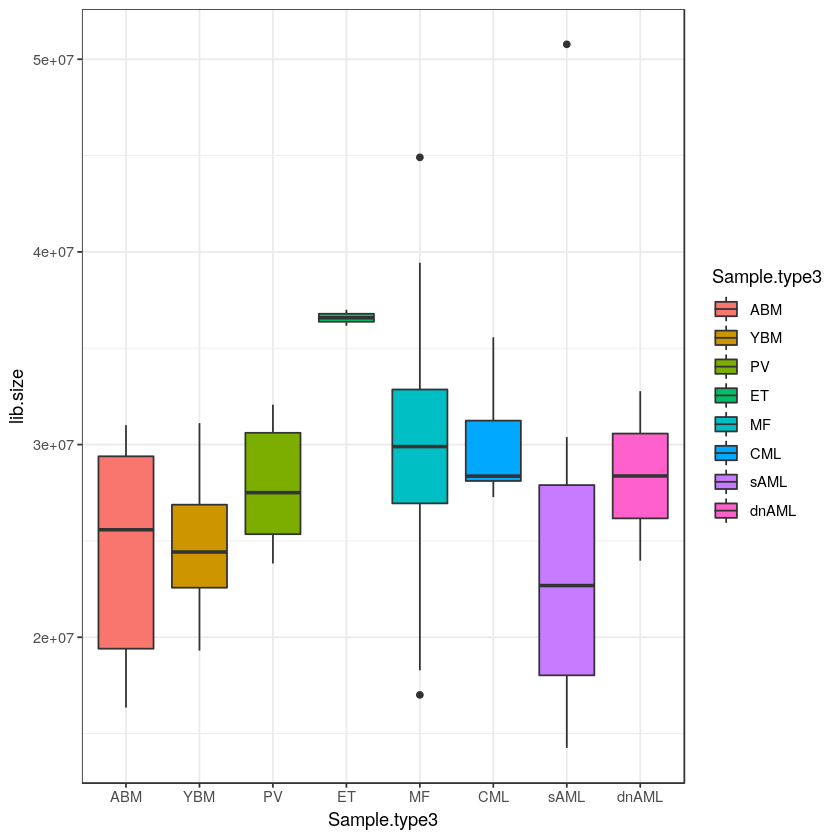

In [18]:
library(ggplot2)
x.all$samples
table(x.all$samples$Sample.type3)
x.all$samples$Sample.type3 <- factor(as.character(x.all$samples$Sample.type3),
                                    levels=c("ABM", "YBM", "PV", "ET", "MF", "CML", "sAML", "dnAML"))
ggplot(x.all$samples, aes(x=Sample.type3, y=lib.size, fill=Sample.type3)) + geom_boxplot() + theme_bw()

## Analyses

[1] 20345    10

[1] 9324   10

Warning message in brewer.pal(nlevels(col.samp.ABM.ET.PB), "Paired"):
“minimal value for n is 3, returning requested palette with 3 different levels
”

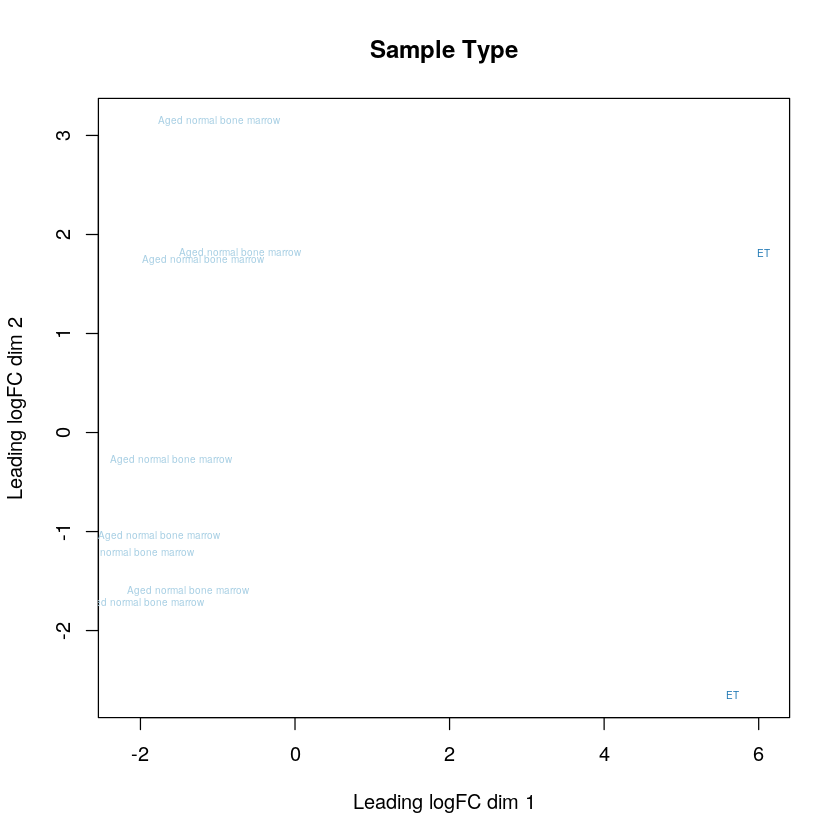

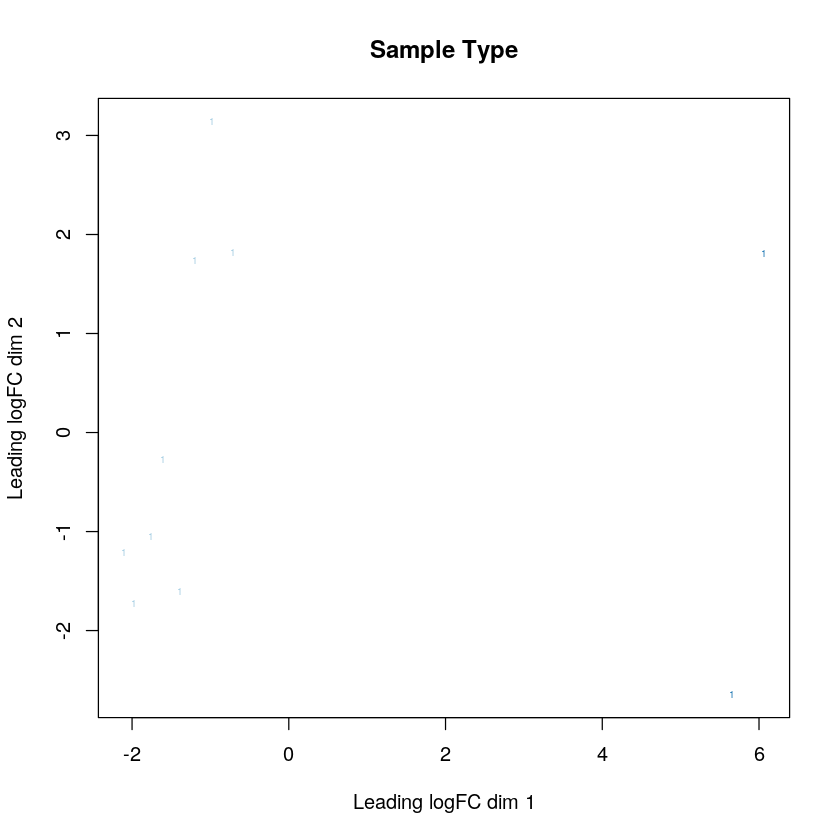

In [20]:
geneCount_coding.ABM.ET.PB <- subset(geneCount.ABM.ET.PB, row.names(geneCount.ABM.ET.PB) %in% protein_coding_ids)

id_list <- gsub("[.].*$","", rownames(geneCount_coding.ABM.ET.PB))
rownames(geneCount_coding.ABM.ET.PB) <- id_list
x.ABM.ET.PB <- DGEList(counts = geneCount_coding.ABM.ET.PB, lib.size = colSums(geneCount_coding.ABM.ET.PB),
norm.factors = rep(1,ncol(geneCount_coding.ABM.ET.PB)), samples = metaCrop.ABM.ET.PB,
group = metaCrop.ABM.ET.PB$Treatment, genes = id_list, remove.zeros = FALSE) 
dim(geneCount_coding.ABM.ET.PB)
x.ABM.ET.PB$genes[,2:3] <- pcgenes[match(pcgenes$ENSEMBL,id_list),c("ENTREZID","SYMBOL")]

cpm <- cpm(x.ABM.ET.PB)
lcpm <- cpm(x.ABM.ET.PB, log=TRUE)
keep.exprs <- rowSums(cpm>1)>=10
x.ABM.ET.PB <- x.ABM.ET.PB[keep.exprs,, keep.lib.sizes=FALSE]
dim(x.ABM.ET.PB)
x.ABM.ET.PB <- calcNormFactors(x.ABM.ET.PB, method = "TMM")
col.samp.ABM.ET.PB <- samp.type.ABM.ET.PB <- as.factor(x.ABM.ET.PB$samples$Sample.type)
levels(col.samp.ABM.ET.PB) <-  brewer.pal(nlevels(col.samp.ABM.ET.PB), "Paired") #if more than 2 conditions
col.samp.ABM.ET.PB <- as.character(col.samp.ABM.ET.PB)

par(mfrow=c(1,1))
plotMDS(lcpm, labels=samp.type.ABM.ET.PB, col=col.samp.ABM.ET.PB, cex=.5)
title(main="Sample Type")
plotMDS(lcpm, labels=x.ABM.ET.PB$samples$group, col=col.samp.ABM.ET.PB, cex=.5)
title(main="Sample Type")

[1] 20345    14

[1] 8650   14

Warning message in brewer.pal(nlevels(col.samp.ABM.PV.PB), "Paired"):
“minimal value for n is 3, returning requested palette with 3 different levels
”

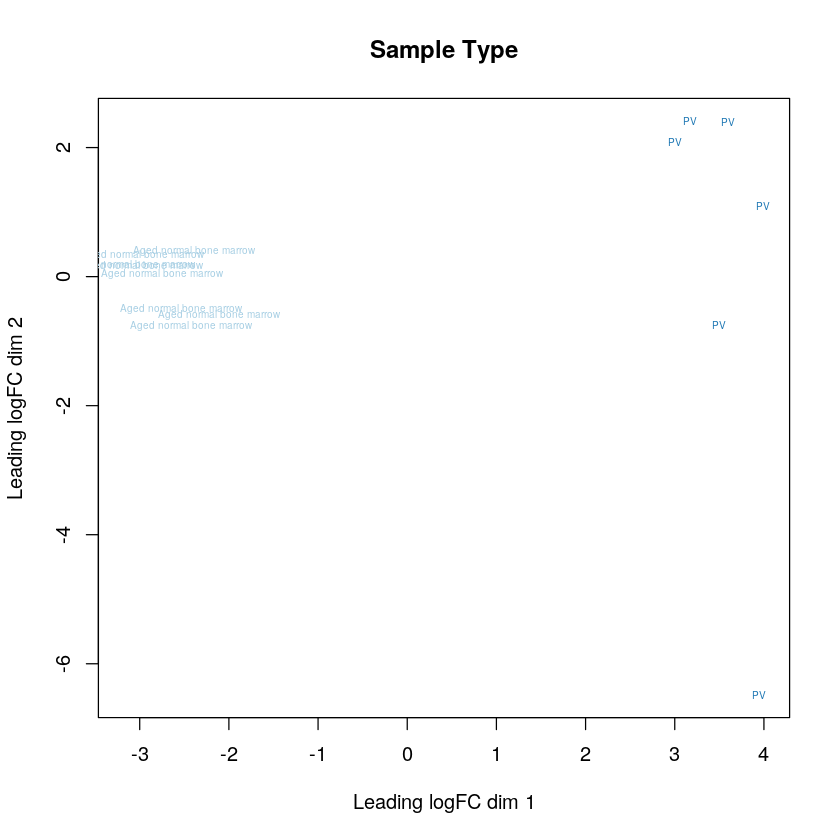

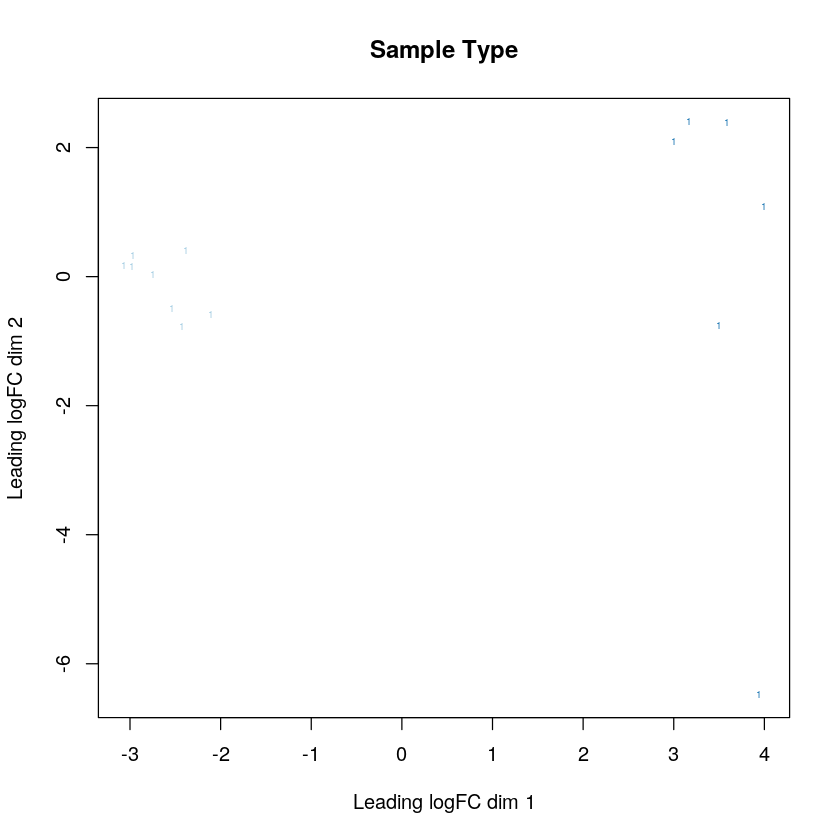

In [21]:
geneCount_coding.ABM.PV.PB <- subset(geneCount.ABM.PV.PB, row.names(geneCount.ABM.PV.PB) %in% protein_coding_ids)

id_list <- gsub("[.].*$","", rownames(geneCount_coding.ABM.PV.PB))
rownames(geneCount_coding.ABM.PV.PB) <- id_list
x.ABM.PV.PB <- DGEList(counts = geneCount_coding.ABM.PV.PB, lib.size = colSums(geneCount_coding.ABM.PV.PB),
norm.factors = rep(1,ncol(geneCount_coding.ABM.PV.PB)), samples = metaCrop.ABM.PV.PB,
group = metaCrop.ABM.PV.PB$Treatment, genes = id_list, remove.zeros = FALSE) 
dim(geneCount_coding.ABM.PV.PB)
x.ABM.PV.PB$genes[,2:3] <- pcgenes[match(pcgenes$ENSEMBL,id_list),c("ENTREZID","SYMBOL")]

cpm <- cpm(x.ABM.PV.PB)
lcpm <- cpm(x.ABM.PV.PB, log=TRUE)
keep.exprs <- rowSums(cpm>1)>=14
x.ABM.PV.PB <- x.ABM.PV.PB[keep.exprs,, keep.lib.sizes=FALSE]
dim(x.ABM.PV.PB)
x.ABM.PV.PB <- calcNormFactors(x.ABM.PV.PB, method = "TMM")
col.samp.ABM.PV.PB <- samp.type.ABM.PV.PB <- as.factor(x.ABM.PV.PB$samples$Sample.type)
levels(col.samp.ABM.PV.PB) <-  brewer.pal(nlevels(col.samp.ABM.PV.PB), "Paired") #if more than 2 conditions
col.samp.ABM.PV.PB <- as.character(col.samp.ABM.PV.PB)

par(mfrow=c(1,1))
plotMDS(lcpm, labels=samp.type.ABM.PV.PB, col=col.samp.ABM.PV.PB, cex=.5)
title(main="Sample Type")
plotMDS(lcpm, labels=x.ABM.PV.PB$samples$group, col=col.samp.ABM.PV.PB, cex=.5)
title(main="Sample Type")

[1] 20345    32

[1] 12055    32

Warning message in brewer.pal(nlevels(col.samp.ABM.MF.PB), "Paired"):
“minimal value for n is 3, returning requested palette with 3 different levels
”

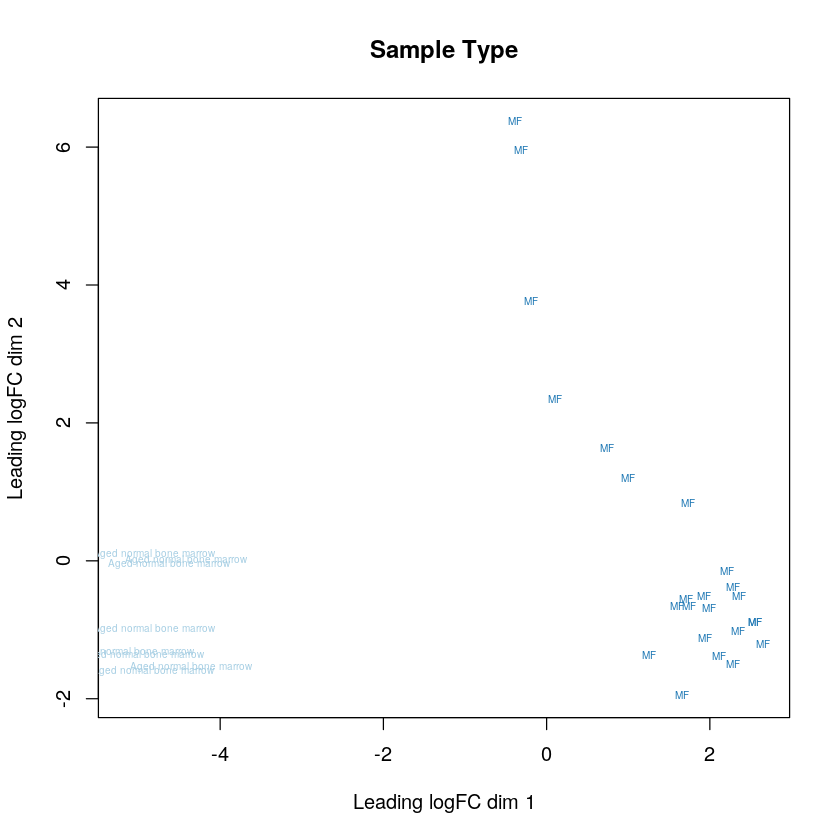

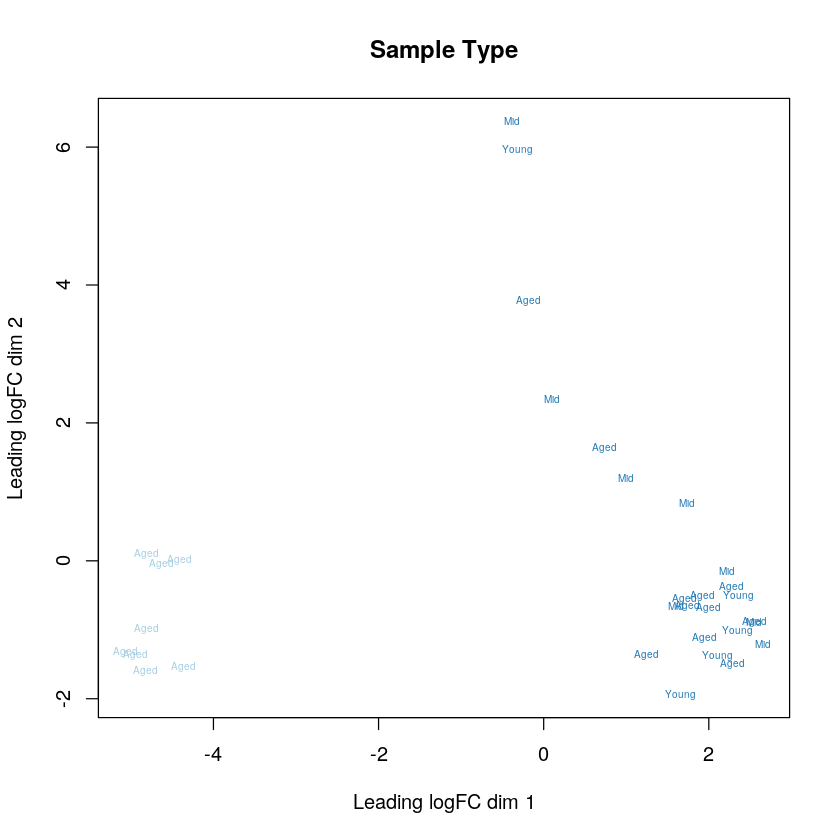

In [22]:
geneCount_coding.ABM.MF.PB <- subset(geneCount.ABM.MF.PB, row.names(geneCount.ABM.MF.PB) %in% protein_coding_ids)

id_list <- gsub("[.].*$","", rownames(geneCount_coding.ABM.MF.PB))
rownames(geneCount_coding.ABM.MF.PB) <- id_list
x.ABM.MF.PB <- DGEList(counts = geneCount_coding.ABM.MF.PB, lib.size = colSums(geneCount_coding.ABM.MF.PB),
norm.factors = rep(1,ncol(geneCount_coding.ABM.MF.PB)), samples = metaCrop.ABM.MF.PB,
group = metaCrop.ABM.MF.PB$Treatment, genes = id_list, remove.zeros = FALSE) 
dim(geneCount_coding.ABM.MF.PB)
x.ABM.MF.PB$genes[,2:3] <- pcgenes[match(pcgenes$ENSEMBL,id_list),c("ENTREZID","SYMBOL")]

cpm <- cpm(x.ABM.MF.PB)
lcpm <- cpm(x.ABM.MF.PB, log=TRUE)
keep.exprs <- rowSums(cpm>1)>=16
x.ABM.MF.PB <- x.ABM.MF.PB[keep.exprs,, keep.lib.sizes=FALSE]
dim(x.ABM.MF.PB)
x.ABM.MF.PB <- calcNormFactors(x.ABM.MF.PB, method = "TMM")
col.samp.ABM.MF.PB <- samp.type.ABM.MF.PB <- as.factor(x.ABM.MF.PB$samples$Sample.type)
levels(col.samp.ABM.MF.PB) <-  brewer.pal(nlevels(col.samp.ABM.MF.PB), "Paired") #if more than 2 conditions
col.samp.ABM.MF.PB <- as.character(col.samp.ABM.MF.PB)

par(mfrow=c(1,1))
plotMDS(lcpm, labels=samp.type.ABM.MF.PB, col=col.samp.ABM.MF.PB, cex=.5)
title(main="Sample Type")
plotMDS(lcpm, labels=x.ABM.MF.PB$samples$Age, col=col.samp.ABM.MF.PB, cex=.5)
title(main="Sample Type")

[1] 20345    13

[1] 9087   13

Warning message in brewer.pal(nlevels(col.samp.ABM.CML.PB), "Paired"):
“minimal value for n is 3, returning requested palette with 3 different levels
”

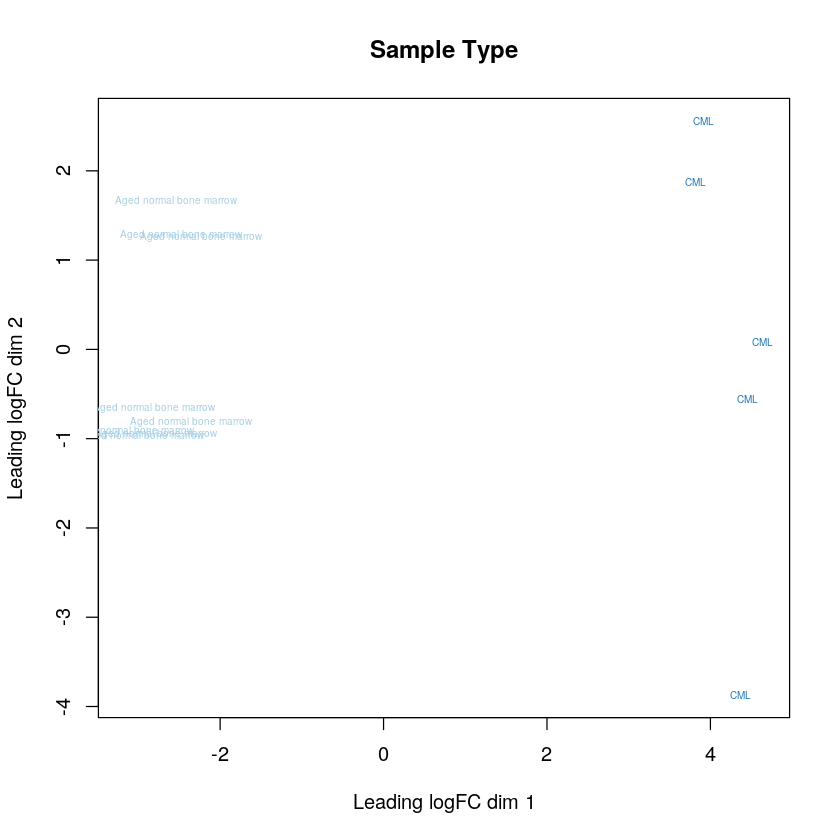

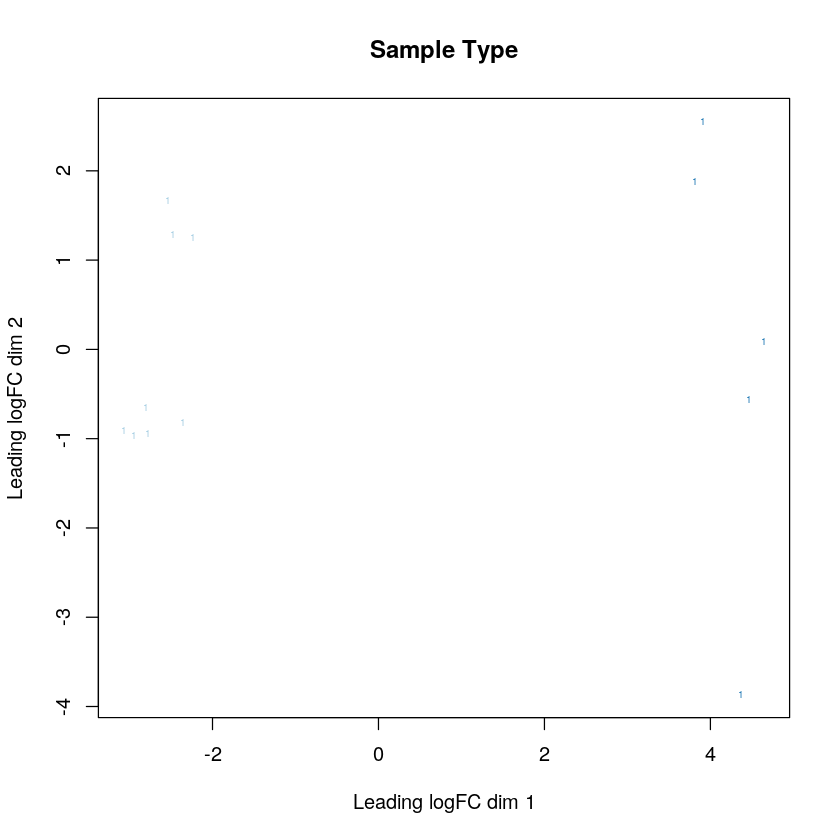

In [23]:
geneCount_coding.ABM.CML.PB <- subset(geneCount.ABM.CML.PB, row.names(geneCount.ABM.CML.PB) %in% protein_coding_ids)

id_list <- gsub("[.].*$","", rownames(geneCount_coding.ABM.CML.PB))
rownames(geneCount_coding.ABM.CML.PB) <- id_list
x.ABM.CML.PB <- DGEList(counts = geneCount_coding.ABM.CML.PB, lib.size = colSums(geneCount_coding.ABM.CML.PB),
norm.factors = rep(1,ncol(geneCount_coding.ABM.CML.PB)), samples = metaCrop.ABM.CML.PB,
group = metaCrop.ABM.CML.PB$Treatment, genes = id_list, remove.zeros = FALSE) 
dim(geneCount_coding.ABM.CML.PB)
x.ABM.CML.PB$genes[,2:3] <- pcgenes[match(pcgenes$ENSEMBL,id_list),c("ENTREZID","SYMBOL")]

cpm <- cpm(x.ABM.CML.PB)
lcpm <- cpm(x.ABM.CML.PB, log=TRUE)
keep.exprs <- rowSums(cpm>1)>=13
x.ABM.CML.PB <- x.ABM.CML.PB[keep.exprs,, keep.lib.sizes=FALSE]
dim(x.ABM.CML.PB)
x.ABM.CML.PB <- calcNormFactors(x.ABM.CML.PB, method = "TMM")
col.samp.ABM.CML.PB <- samp.type.ABM.CML.PB <- as.factor(x.ABM.CML.PB$samples$Sample.type)
levels(col.samp.ABM.CML.PB) <-  brewer.pal(nlevels(col.samp.ABM.CML.PB), "Paired") #if more than 2 conditions
col.samp.ABM.CML.PB <- as.character(col.samp.ABM.CML.PB)

par(mfrow=c(1,1))
plotMDS(lcpm, labels=samp.type.ABM.CML.PB, col=col.samp.ABM.CML.PB, cex=.5)
title(main="Sample Type")
plotMDS(lcpm, labels=x.ABM.CML.PB$samples$group, col=col.samp.ABM.CML.PB, cex=.5)
title(main="Sample Type")

[1] "X368_ACAGTG_S0" "X380_ACAGTG_S0" "X401_ACAGTG_S0" "X402_ACAGTG_S0"
 [5] "X410_ACAGTG_S0" "X415_ACAGTG_S0" "X416_ACAGTG_S0" "X426_ACAGTG_S0"
 [9] "X19_MDStoAML"   "X20_MDStoAML"   "X48_MDStoAML"   "X36"           
[13] "X42"            "X87"            "X89"            "X102"          
[17] "X107"

[1] 17 15

[1] 20345    17

[1] 10231    17

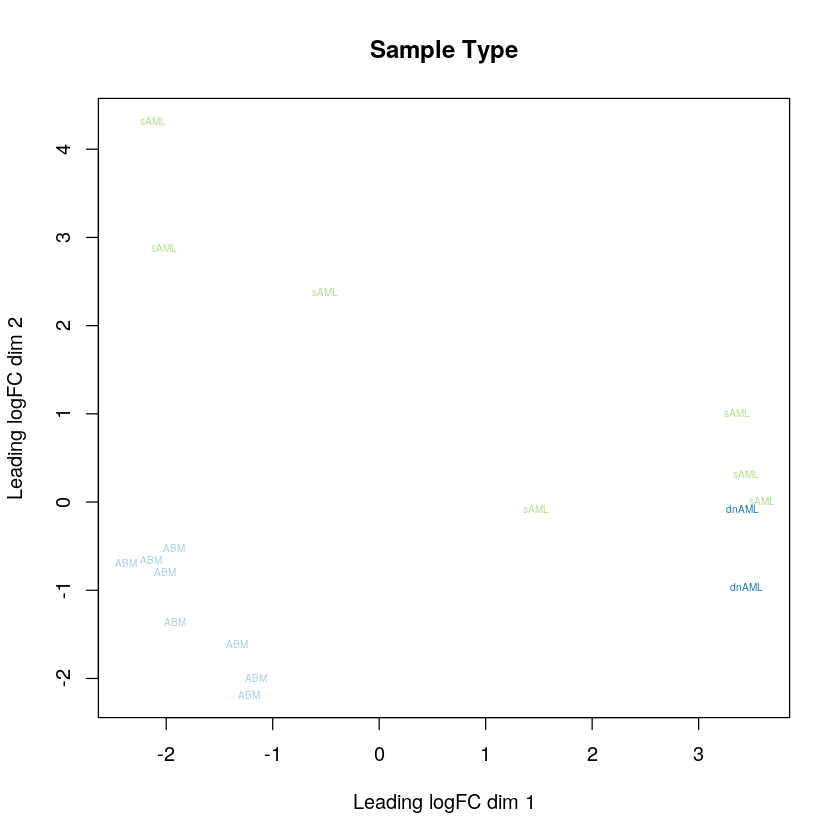

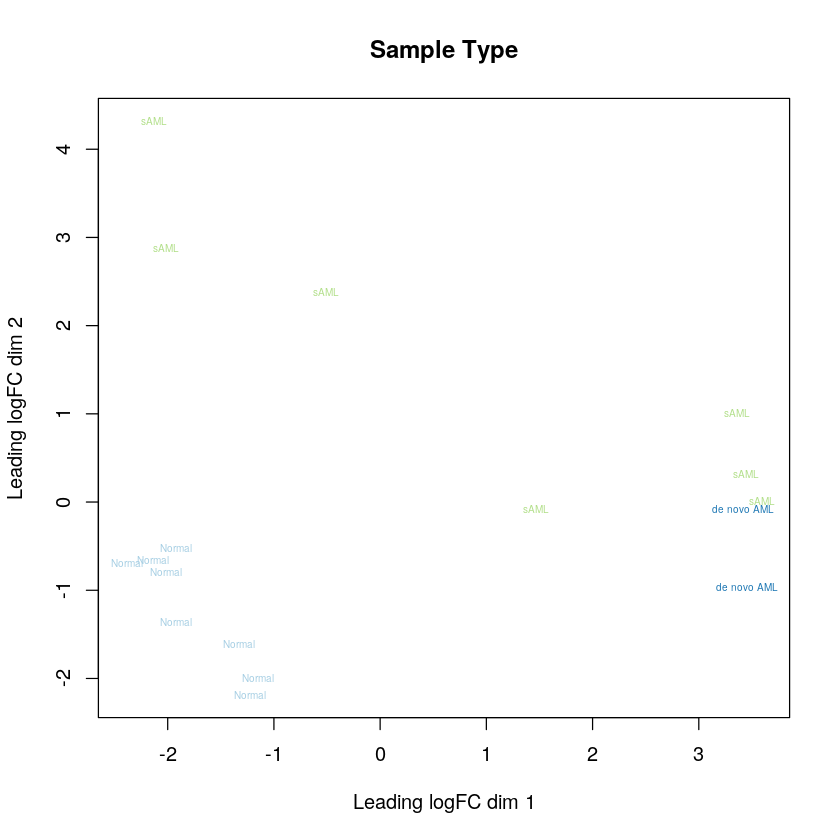

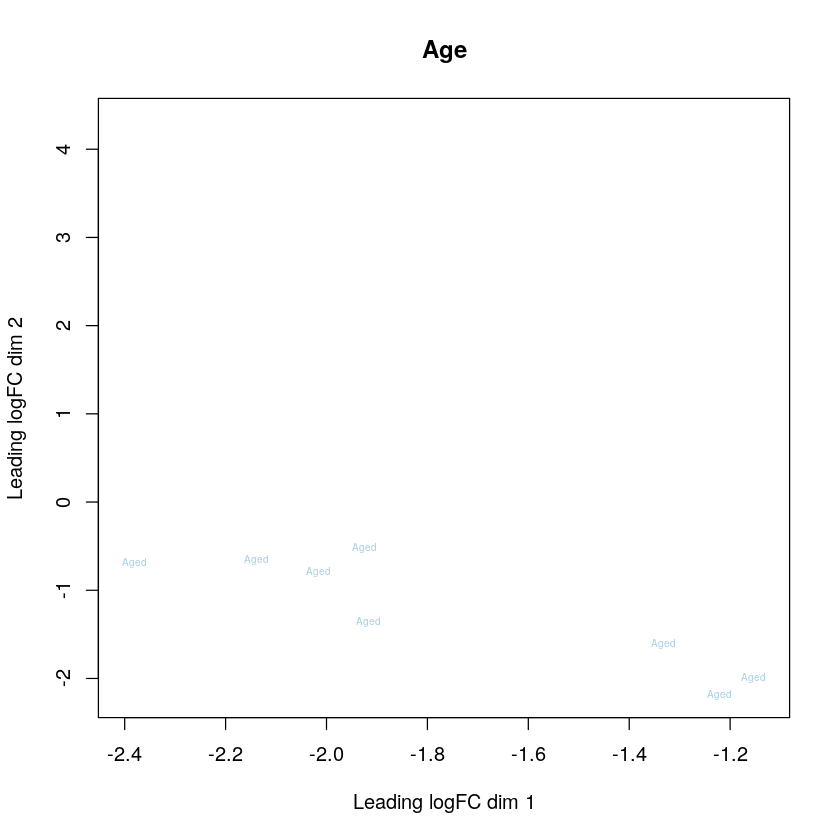

In [25]:
geneCount_coding.ABM.sAML.PB <- subset(geneCount.ABM.sAML.PB, row.names(geneCount.ABM.sAML.PB) %in% protein_coding_ids)
colnames(geneCount_coding.ABM.sAML.PB)
dim(metaCrop.ABM.sAML.PB)
id_list <- gsub("[.].*$","", rownames(geneCount_coding.ABM.sAML.PB))
rownames(geneCount_coding.ABM.sAML.PB) <- id_list
x.ABM.sAML.PB <- DGEList(counts = geneCount_coding.ABM.sAML.PB, lib.size = colSums(geneCount_coding.ABM.sAML.PB),
norm.factors = rep(1,ncol(geneCount_coding.ABM.sAML.PB)), samples = metaCrop.ABM.sAML.PB,
group = metaCrop.ABM.sAML.PB$Treatment, genes = id_list, remove.zeros = FALSE) 
dim(geneCount_coding.ABM.sAML.PB)
x.ABM.sAML.PB$genes[,2:3] <- pcgenes[match(pcgenes$ENSEMBL,id_list),c("ENTREZID","SYMBOL")]

cpm <- cpm(x.ABM.sAML.PB)
lcpm <- cpm(x.ABM.sAML.PB, log=TRUE)
keep.exprs <- rowSums(cpm>1)>=12
x.ABM.sAML.PB <- x.ABM.sAML.PB[keep.exprs,, keep.lib.sizes=FALSE]
dim(x.ABM.sAML.PB)
x.ABM.sAML.PB <- calcNormFactors(x.ABM.sAML.PB, method = "TMM")
col.samp.ABM.sAML.PB <- samp.type.ABM.sAML.PB <- as.factor(x.ABM.sAML.PB$samples$Sample.type3)
levels(col.samp.ABM.sAML.PB) <-  brewer.pal(nlevels(col.samp.ABM.sAML.PB), "Paired") #if more than 2 conditions
col.samp.ABM.sAML.PB <- as.character(col.samp.ABM.sAML.PB)

par(mfrow=c(1,1))
plotMDS(lcpm, labels=samp.type.ABM.sAML.PB, col=col.samp.ABM.sAML.PB, cex=.5)
title(main="Sample Type")
plotMDS(lcpm, labels=x.ABM.sAML.PB$samples$Condition, col=col.samp.ABM.sAML.PB, cex=.5)
title(main="Sample Type")
plotMDS(lcpm, labels=x.ABM.sAML.PB$samples$Age, col=col.samp.ABM.sAML.PB, cex=.5)
title(main="Age")

[1] 20345    26

[1] 6680   26

[1] 0.9384762 0.8669014 0.8424180 0.9890997 1.0339389 1.0283584 1.1030943
 [8] 0.9208322 0.8834607 1.0501897 1.1011466 0.8254077 1.0718295 1.1011026
[15] 1.0672812 1.0536090 1.0626020 0.9492557 1.0961787 1.0413066 0.9744139
[22] 0.9751872 0.9578412 1.0574032 1.1012207 1.0001669

Warning message in brewer.pal(nlevels(col.samp.AML.MF.PB), "Paired"):
“minimal value for n is 3, returning requested palette with 3 different levels
”

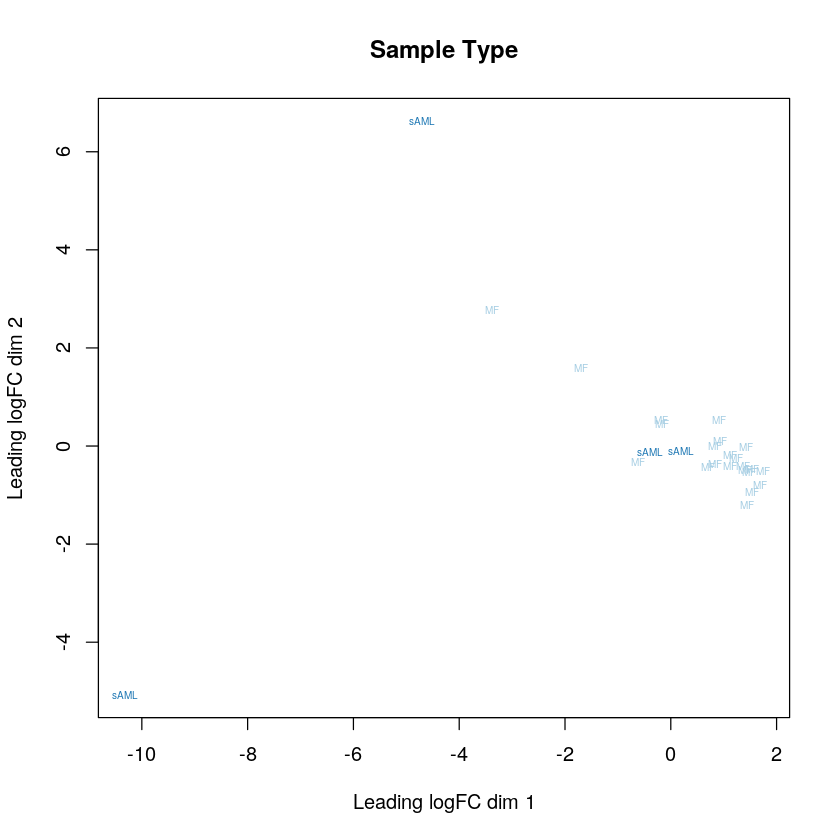

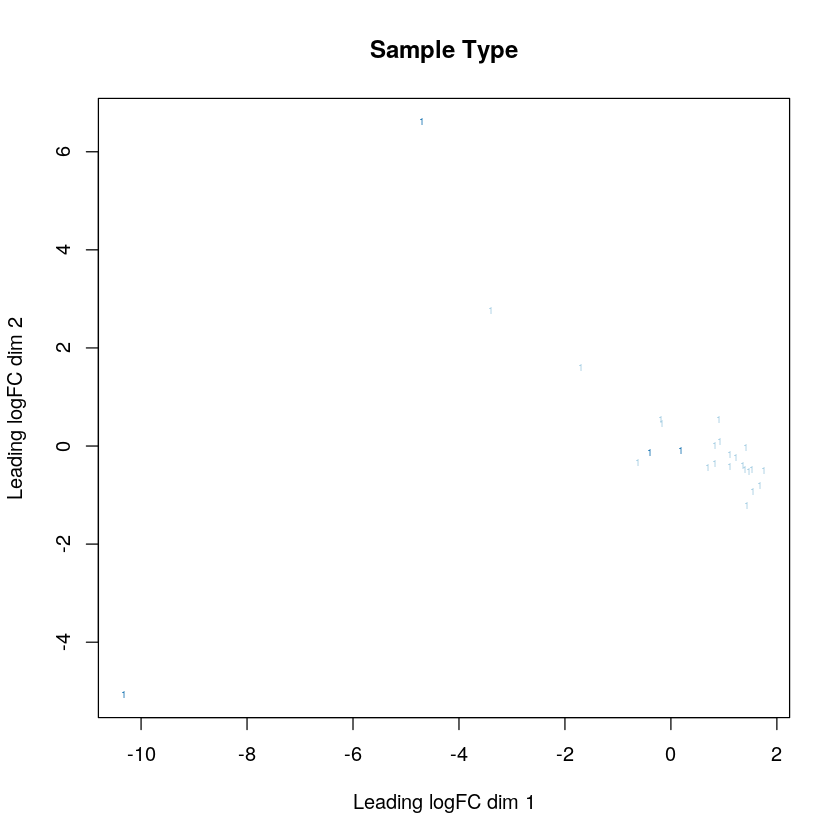

In [27]:
geneCount_coding.AML.MF.PB <- subset(geneCount.AML.MF.PB, row.names(geneCount.AML.MF.PB) %in% protein_coding_ids)

id_list <- gsub("[.].*$","", rownames(geneCount_coding.AML.MF.PB))
rownames(geneCount_coding.AML.MF.PB) <- id_list
x.AML.MF.PB <- DGEList(counts = geneCount_coding.AML.MF.PB, lib.size = colSums(geneCount_coding.AML.MF.PB),
norm.factors = rep(1,ncol(geneCount_coding.AML.MF.PB)), samples = metaCrop.AML.MF.PB,
group = metaCrop.AML.MF.PB$Treatment, genes = id_list, remove.zeros = FALSE) 
dim(geneCount_coding.AML.MF.PB)
x.AML.MF.PB$genes[,2:3] <- pcgenes[match(pcgenes$ENSEMBL,id_list),c("ENTREZID","SYMBOL")]

cpm <- cpm(x.AML.MF.PB)
lcpm <- cpm(x.AML.MF.PB, log=TRUE)
keep.exprs <- rowSums(cpm>1)>=26
x.AML.MF.PB <- x.AML.MF.PB[keep.exprs,, keep.lib.sizes=FALSE]
dim(x.AML.MF.PB)
x.AML.MF.PB <- calcNormFactors(x.AML.MF.PB, method = "TMM")
x.AML.MF.PB$samples$norm.factors
col.samp.AML.MF.PB <- samp.type.AML.MF.PB <- as.factor(x.AML.MF.PB$samples$Sample.type3)
levels(col.samp.AML.MF.PB) <-  brewer.pal(nlevels(col.samp.AML.MF.PB), "Paired") #if more than 2 conditions
col.samp.AML.MF.PB <- as.character(col.samp.AML.MF.PB)

par(mfrow=c(1,1))
plotMDS(lcpm, labels=samp.type.AML.MF.PB, col=col.samp.AML.MF.PB, cex=.5)
title(main="Sample Type")
plotMDS(lcpm, labels=x.AML.MF.PB$samples$group, col=col.samp.AML.MF.PB, cex=.5)
title(main="Sample Type")
#plotMDS(lcpm, labels=x.AML.MF.PB$samples$Age, col=col.samp.ABM.AML.PB, cex=.5)
#title(main="Age")
#plotMDS(lcpm, labels=x.AML.MF.PB$samples$Sex, col=col.samp.ABM.AML.PB, cex=.5)
#title(main="Sex")

### Limma Analysis to identify Differentially Expressed Genes

In [28]:
samples.tmp <- x.all$sample$Sample.type3
table(samples.tmp)
samples.all <- factor(as.character(samples.tmp), 
                      levels=c("ABM", "YBM", "ET", "PV", "MF", "CML", "sAML", "dnAML"))
levels(samples.all)
design.all <- model.matrix(~0 + samples.all)
colnames(design.all) <- c("ABM", "YBM", "ET", "PV", "MF", "CML", "sAML", "dnAML")
celltypes.all <- as.factor(as.character(x.all$sample$CellType))
cm.all <- makeContrasts(ABM-YBM, ABM-ET, ABM-PV, ABM-MF,
                        ABM-sAML,ABM-CML, levels=design.all)
v.all <- voom(x.all, design.all, plot=FALSE)
vfit.all <- lmFit(v.all,design.all)
vfit.all <- contrasts.fit(vfit.all, contrasts=cm.all)
efit.all <- eBayes(vfit.all)
topTable(efit.all, coef=4)
dt.all <- decideTests(efit.all)
summary(dt.all)
length(which(dt.all!=0))
topTable.all <- topTreat(efit.all, coef=1, n=Inf, sort.by="p")
topTable.all.ABM.YBM <- topTreat(efit.all, coef=1, n=Inf, sort.by="p")
topTable.all.ABM.ET <- topTreat(efit.all, coef=2, n=Inf, sort.by="p")
topTable.all.ABM.PV <- topTreat(efit.all, coef=3, n=Inf, sort.by="p")
topTable.all.ABM.MF <- topTreat(efit.all, coef=4, n=Inf, sort.by="p")
topTable.all.ABM.sAML <- topTreat(efit.all, coef=5, n=Inf, sort.by="p")
topTable.all.ABM.CML <- topTreat(efit.all, coef=6, n=Inf, sort.by="p")


samples.tmp
  ABM   YBM    PV    ET    MF   CML  sAML dnAML 
    8     8     6     2    24     5    11     2 

[1] "ABM"   "YBM"   "ET"    "PV"    "MF"    "CML"   "sAML"  "dnAML"

,genes,ENTREZID,SYMBOL,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000112308,ENSG00000112308,81688,C6orf62,4.439336,9.088589,16.59210,6.999484e-25,4.746415e-21,46.32838
ENSG00000171862,ENSG00000171862,5728,PTEN,3.382819,8.472251,16.54379,8.148597e-25,4.746415e-21,46.16930
ENSG00000107951,ENSG00000107951,55149,MTPAP,4.214555,6.889898,16.45817,1.067570e-24,4.746415e-21,45.83786
ENSG00000124193,ENSG00000124193,6431,SRSF6,4.328057,9.498925,15.89713,6.405618e-24,2.135953e-20,44.13810
ENSG00000162408,ENSG00000162408,79707,NOL9,2.480109,5.828263,15.67784,1.303905e-23,3.478298e-20,43.29028
ENSG00000102580,ENSG00000102580,5611,DNAJC3,3.299824,6.869693,15.58451,1.767713e-23,3.929626e-20,43.07956
ENSG00000187446,ENSG00000187446,11261,CHP1,4.177966,7.491332,14.60425,4.613338e-22,7.791706e-19,39.89237
ENSG00000162695,ENSG00000162695,148867,SLC30A7,3.296333,6.289748,14.59196,4.809618e-22,7.791706e-19,39.79395
ENSG00000088205,ENSG00000088205,8886,DDX18,1.678763,6.852420,14.56571,5.257561e-22,7.791706e-19,39.74419


       ABM - YBM ABM - ET ABM - PV ABM - MF ABM - sAML ABM - CML
Down           0     3735     4022     4682       2461      4134
NotSig     13338     7840     5756     4253       7778      6164
Up             0     1763     3560     4403       3099      3040

[1] 34899

In [31]:
samples.tmp <- x.ABM.ET.PB$sample$Sample.type
table(samples.tmp)
samples.ABM.ET.PB <- as.factor(samples.tmp)
design.ABM.ET.PB <- model.matrix(~0 + samples.ABM.ET.PB)
colnames(design.ABM.ET.PB) <- c("AgedBoneMarrowCtrl", "ET")
celltypes.ABM.ET.PB <- as.factor(as.character(x.ABM.ET.PB$sample$CellType))
cm.ABM.ET.PB <- makeContrasts(ET-AgedBoneMarrowCtrl, levels=design.ABM.ET.PB)
v.ABM.ET.PB <- voom(x.ABM.ET.PB, design.ABM.ET.PB, plot=FALSE)
vfit.ABM.ET.PB <- lmFit(v.ABM.ET.PB,design.ABM.ET.PB)
vfit.ABM.ET.PB <- contrasts.fit(vfit.ABM.ET.PB, contrasts=cm.ABM.ET.PB)
efit.ABM.ET.PB <- eBayes(vfit.ABM.ET.PB)
topTable(efit.ABM.ET.PB, coef=1)
dt.ABM.ET.PB <- decideTests(efit.ABM.ET.PB)
summary(dt.ABM.ET.PB)
length(which(dt.ABM.ET.PB!=0))

topTable.ABM.ET.PB <- topTreat(efit.ABM.ET.PB, coef=1, n=Inf, sort.by="p")
#write.csv(topTable.ABM.ET.PB, file="LImma_DE_AgedBMvsET_Prog_Holm_Jamieson_RNASeq_TCW.csv")

samples.tmp
Aged normal bone marrow                      ET 
                      8                       2 

,genes,ENTREZID,SYMBOL,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000105063,ENSG00000105063,22870,PPP6R1,7.018382,2.957764,32.87218,3.001035e-13,2.798165e-09,19.62511
ENSG00000104852,ENSG00000104852,6625,SNRNP70,6.757671,2.648825,28.51591,1.655354e-12,7.717262e-09,18.33284
ENSG00000180448,ENSG00000180448,23526,ARHGAP45,6.615214,2.657778,25.95630,5.104640e-12,1.098943e-08,17.45111
ENSG00000141959,ENSG00000141959,5211,PFKL,5.732041,3.795635,24.93782,8.235349e-12,1.098943e-08,17.14976
ENSG00000112787,ENSG00000112787,57666,FBRSL1,6.021483,2.020909,25.27599,7.011622e-12,1.098943e-08,17.10455
ENSG00000076928,ENSG00000076928,9138,ARHGEF1,6.732325,2.517258,24.85691,8.561151e-12,1.098943e-08,17.02425
ENSG00000136490,ENSG00000136490,80774,LIMD2,6.911630,3.516574,24.59753,9.703121e-12,1.098943e-08,17.00411
ENSG00000188486,ENSG00000188486,3014,H2AFX,5.708328,2.141790,24.56615,9.852087e-12,1.098943e-08,16.82461
ENSG00000088882,ENSG00000088882,56265,CPXM1,5.364768,3.981579,24.04247,1.273973e-11,1.114764e-08,16.79452


       ET - AgedBoneMarrowCtrl
Down                      2302
NotSig                    4016
Up                        3006

[1] 5308

In [32]:
samples.tmp <- x.ABM.PV.PB$sample$Sample.type
table(samples.tmp)
samples.ABM.PV.PB <- as.factor(samples.tmp)
design.ABM.PV.PB <- model.matrix(~0 + samples.ABM.PV.PB)
colnames(design.ABM.PV.PB) <- c("AgedBoneMarrowCtrl", "PV")
cm.ABM.PV.PB <- makeContrasts(PV-AgedBoneMarrowCtrl, levels=design.ABM.PV.PB)
v.ABM.PV.PB <- voom(x.ABM.PV.PB, design.ABM.PV.PB, plot=FALSE)
vfit.ABM.PV.PB <- lmFit(v.ABM.PV.PB,design.ABM.PV.PB)
vfit.ABM.PV.PB <- contrasts.fit(vfit.ABM.PV.PB, contrasts=cm.ABM.PV.PB)
efit.ABM.PV.PB <- eBayes(vfit.ABM.PV.PB)
topTable(efit.ABM.PV.PB, coef=1)
dt.ABM.PV.PB <- decideTests(efit.ABM.PV.PB)
summary(dt.ABM.PV.PB)
length(which(dt.ABM.PV.PB!=0))
topTable.ABM.PV.PB <- topTreat(efit.ABM.PV.PB, coef=1, n=Inf, sort.by="p")
#write.csv(topTable.ABM.PV.PB, file="Limma_DE_AgedBMvsPV_Prog_Holm_Jamieson_RNASeq_TCW.csv")

samples.tmp
Aged normal bone marrow                      PV 
                      8                       6 

,genes,ENTREZID,SYMBOL,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000105063,ENSG00000105063,22870,PPP6R1,6.892333,4.621933,29.22520,1.817628e-16,9.116792e-13,26.88701
ENSG00000089820,ENSG00000089820,393,ARHGAP4,6.293189,4.818832,28.77712,2.378661e-16,9.116792e-13,26.78856
ENSG00000173020,ENSG00000173020,156,GRK2,6.985151,5.637392,28.31019,3.161893e-16,9.116792e-13,26.69692
ENSG00000185198,ENSG00000185198,400668,PRSS57,6.328459,6.093612,26.28802,1.145152e-15,1.650928e-12,25.72690
ENSG00000157637,ENSG00000157637,124565,SLC38A10,6.646930,3.916490,27.07928,6.845821e-16,1.480409e-12,25.66610
ENSG00000149091,ENSG00000149091,8525,DGKZ,6.154899,4.224680,26.61201,9.259999e-16,1.601980e-12,25.51904
ENSG00000141959,ENSG00000141959,5211,PFKL,5.924473,5.304696,25.91685,1.465182e-15,1.810546e-12,25.39029
ENSG00000124193,ENSG00000124193,6431,SRSF6,-4.064409,10.578631,-25.11154,2.530524e-15,2.379061e-12,25.36946
ENSG00000104852,ENSG00000104852,6625,SNRNP70,7.039541,4.425795,25.05130,2.637848e-15,2.379061e-12,24.62016


       PV - AgedBoneMarrowCtrl
Down                      2895
NotSig                    2666
Up                        3089

[1] 5984

In [33]:
samples.tmp <- x.ABM.MF.PB$sample$Sample.type
table(samples.tmp)
samples.ABM.MF.PB <- as.factor(samples.tmp)
design.ABM.MF.PB <- model.matrix(~0 + samples.ABM.MF.PB)
colnames(design.ABM.MF.PB) <- c("AgedBoneMarrowCtrl", "MF")
cm.ABM.MF.PB <- makeContrasts(MF-AgedBoneMarrowCtrl, levels=design.ABM.MF.PB)
v.ABM.MF.PB <- voom(x.ABM.MF.PB, design.ABM.MF.PB, plot=FALSE)
vfit.ABM.MF.PB <- lmFit(v.ABM.MF.PB,design.ABM.MF.PB)
vfit.ABM.MF.PB <- contrasts.fit(vfit.ABM.MF.PB, contrasts=cm.ABM.MF.PB)
efit.ABM.MF.PB <- eBayes(vfit.ABM.MF.PB)
topTable(efit.ABM.MF.PB, coef=1)
dt.ABM.MF.PB <- decideTests(efit.ABM.MF.PB)
summary(dt.ABM.MF.PB)
length(which(dt.ABM.MF.PB!=0))
topTable.ABM.MF.PB <- topTreat(efit.ABM.MF.PB, coef=1, n=Inf, sort.by="p")
#write.csv(topTable.ABM.MF.PB, file="LImma_DE_AgedBMvsMF_Prog_Holm_Jamieson_RNASeq_TCW.csv")

samples.tmp
Aged normal bone marrow                      MF 
                      8                      24 

,genes,ENTREZID,SYMBOL,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000112308,ENSG00000112308,81688,C6orf62,-4.450732,8.662310,-36.47492,2.350866e-29,2.833969e-25,56.56812
ENSG00000124193,ENSG00000124193,6431,SRSF6,-4.346083,9.247474,-32.69580,9.575039e-28,5.771355e-24,53.06591
ENSG00000171862,ENSG00000171862,5728,PTEN,-3.395091,8.314070,-30.93375,6.202351e-27,2.492311e-23,51.26094
ENSG00000169905,ENSG00000169905,163590,TOR1AIP2,-3.774272,6.191549,-26.93336,6.408128e-25,1.545000e-21,46.70267
ENSG00000009780,ENSG00000009780,199870,FAM76A,-3.853728,4.319172,-27.12903,5.035080e-25,1.517447e-21,46.55321
ENSG00000107951,ENSG00000107951,55149,MTPAP,-4.224144,6.568696,-26.28760,1.436575e-24,2.886318e-21,45.93866
ENSG00000069275,ENSG00000069275,64710,NUCKS1,-3.536677,7.987407,-25.75101,2.848676e-24,4.521167e-21,45.30867
ENSG00000187446,ENSG00000187446,11261,CHP1,-4.182877,7.217865,-25.66736,3.173224e-24,4.521167e-21,45.18879
ENSG00000168092,ENSG00000168092,5049,PAFAH1B2,-3.958651,7.658965,-25.61957,3.375404e-24,4.521167e-21,45.13779


       MF - AgedBoneMarrowCtrl
Down                      4444
NotSig                    3189
Up                        4422

[1] 8866

In [34]:
samples.tmp <- x.ABM.CML.PB$sample$Sample.type
table(samples.tmp)
samples.ABM.CML.PB <- as.factor(samples.tmp)
design.ABM.CML.PB <- model.matrix(~0 + samples.ABM.CML.PB)
colnames(design.ABM.CML.PB) <- c("AgedBoneMarrowCtrl", "CML")
cm.ABM.CML.PB <- makeContrasts(CML-AgedBoneMarrowCtrl, levels=design.ABM.CML.PB)
v.ABM.CML.PB <- voom(x.ABM.CML.PB, design.ABM.CML.PB, plot=FALSE)
vfit.ABM.CML.PB <- lmFit(v.ABM.CML.PB,design.ABM.CML.PB)
vfit.ABM.CML.PB <- contrasts.fit(vfit.ABM.CML.PB, contrasts=cm.ABM.CML.PB)
efit.ABM.CML.PB <- eBayes(vfit.ABM.CML.PB)
topTable(efit.ABM.CML.PB, coef=1)
dt.ABM.CML.PB <- decideTests(efit.ABM.CML.PB)
summary(dt.ABM.CML.PB)

length(which(dt.ABM.CML.PB!=0))
topTable.ABM.CML.PB <- topTreat(efit.ABM.CML.PB, coef=1, n=Inf, sort.by="p")
#write.csv(topTable.ABM.CML.PB, file="Limma_DE_AgedBMvsCML_Prog_Holm_Jamieson_RNASeq_TCW.csv")
topTable.ABM.CML.PB[topTable.ABM.CML.PB$ENTREZID %in% c("79058","5546","5371","1050","6688","6929",
                                                        "7709","4193","4221","1025","4211","4066"),]

samples.tmp
Aged normal bone marrow                     CML 
                      8                       5 

,genes,ENTREZID,SYMBOL,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000196924,ENSG00000196924,2316,FLNA,7.262436,5.125063,39.38393,7.924785e-17,7.201252e-13,27.58100
ENSG00000105063,ENSG00000105063,22870,PPP6R1,7.259667,4.444524,36.45360,2.562999e-16,1.164499e-12,26.52183
ENSG00000104852,ENSG00000104852,6625,SNRNP70,7.006954,4.087444,34.79713,5.187557e-16,1.571311e-12,25.92935
ENSG00000133243,ENSG00000133243,55643,BTBD2,6.646253,3.322905,33.61158,8.769848e-16,1.992290e-12,25.44236
ENSG00000079999,ENSG00000079999,9817,KEAP1,4.770763,4.403169,31.10103,2.837359e-15,3.171202e-12,24.78140
ENSG00000088882,ENSG00000088882,56265,CPXM1,5.459389,5.103849,30.89253,3.140841e-15,3.171202e-12,24.77483
ENSG00000149091,ENSG00000149091,8525,DGKZ,5.931806,3.852038,31.15060,2.769902e-15,3.171202e-12,24.62424
ENSG00000157350,ENSG00000157350,6483,ST3GAL2,5.795419,3.093739,31.13717,2.787999e-15,3.171202e-12,24.50256
ENSG00000112787,ENSG00000112787,57666,FBRSL1,6.205640,3.301120,30.99010,2.994736e-15,3.171202e-12,24.46720


       CML - AgedBoneMarrowCtrl
Down                       3011
NotSig                     2697
Up                         3379

[1] 6390

,genes,ENTREZID,SYMBOL,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000133895,ENSG00000133895,4221,MEN1,5.022381,4.016521,25.855872,4.582793e-14,9.915200e-12,22.287923
ENSG00000071564,ENSG00000071564,6929,TCF3,5.031569,4.723364,17.678187,1.300001e-11,4.491676e-10,17.019550
ENSG00000135679,ENSG00000135679,4193,MDM2,-3.208464,7.262709,-17.602369,1.384520e-11,4.677000e-10,16.955322
ENSG00000143294,ENSG00000143294,5546,PRCC,2.277094,5.583853,16.236567,4.501185e-11,1.079701e-09,15.777984
ENSG00000140464,ENSG00000140464,5371,PML,3.481703,5.564995,16.073118,5.214115e-11,1.205615e-09,15.635561
ENSG00000136807,ENSG00000136807,1025,CDK9,2.612442,4.956515,13.838991,4.498295e-10,6.734103e-09,13.469071
ENSG00000143995,ENSG00000143995,4211,MEIS1,-2.723980,7.364445,-9.063296,1.500144e-07,8.573464e-07,7.397989


In [36]:
samples.tmp <- x.ABM.sAML.PB$sample$Sample.type
table(samples.tmp)
samples.ABM.sAML.PB <- as.factor(samples.tmp)
design.ABM.sAML.PB <- model.matrix(~0 + samples.ABM.sAML.PB)
colnames(design.ABM.sAML.PB) <- c("AgedBoneMarrowCtrl", "sAML")
cm.ABM.sAML.PB <- makeContrasts(sAML-AgedBoneMarrowCtrl, levels=design.ABM.sAML.PB)
v.ABM.sAML.PB <- voom(x.ABM.sAML.PB, design.ABM.sAML.PB, plot=FALSE)
vfit.ABM.sAML.PB <- lmFit(v.ABM.sAML.PB,design.ABM.sAML.PB)
vfit.ABM.sAML.PB <- contrasts.fit(vfit.ABM.sAML.PB, contrasts=cm.ABM.sAML.PB)
efit.ABM.sAML.PB <- eBayes(vfit.ABM.sAML.PB)
topTable(efit.ABM.sAML.PB, coef=1)
dt.ABM.sAML.PB <- decideTests(efit.ABM.sAML.PB)
summary(dt.ABM.sAML.PB)

length(which(dt.ABM.sAML.PB != 0))
topTable.ABM.sAML.PB <- topTreat(efit.ABM.sAML.PB, coef=1, n=Inf, sort.by="p")
#write.csv(topTable.ABM.sAML.PB, file="Limma_DE_AgedBMvssAML_Prog_Holm_Jamieson_RNASeq_TCW.csv")

samples.tmp
Aged normal bone marrow                    sAML 
                      8                       9 

,genes,ENTREZID,SYMBOL,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000111679,ENSG00000111679,5777,PTPN6,1.868020,8.254642,11.077145,8.391434e-10,8.585276e-06,12.584657
ENSG00000128340,ENSG00000128340,5880,RAC2,1.660394,8.537634,8.941949,2.734019e-08,8.776007e-05,9.294705
ENSG00000180304,ENSG00000180304,4947,OAZ2,1.737881,5.699188,8.905365,2.915702e-08,8.776007e-05,9.193122
ENSG00000064601,ENSG00000064601,5476,CTSA,2.311608,6.623452,8.813224,3.431144e-08,8.776007e-05,9.060542
ENSG00000072786,ENSG00000072786,6793,STK10,1.547620,5.116472,8.571795,5.283004e-08,1.061237e-04,8.607389
ENSG00000166888,ENSG00000166888,6778,STAT6,1.877058,5.394849,8.481205,6.223656e-08,1.061237e-04,8.463013
ENSG00000089159,ENSG00000089159,5829,PXN,2.520644,3.417745,8.363159,7.717333e-08,1.127943e-04,8.016004
ENSG00000094916,ENSG00000094916,23468,CBX5,-2.138627,9.766589,-7.942621,1.685367e-07,1.724299e-04,7.542061
ENSG00000168890,ENSG00000168890,129303,TMEM150A,2.493779,3.085090,7.997192,1.520913e-07,1.724299e-04,7.356801


       sAML - AgedBoneMarrowCtrl
Down                         960
NotSig                      8156
Up                          1115

[1] 2075

## Supplemental Figure S2C
### Heatmap of AML vs MF DE Genes in Progenitor Cells

samples.tmp
  MF sAML 
  22    4 

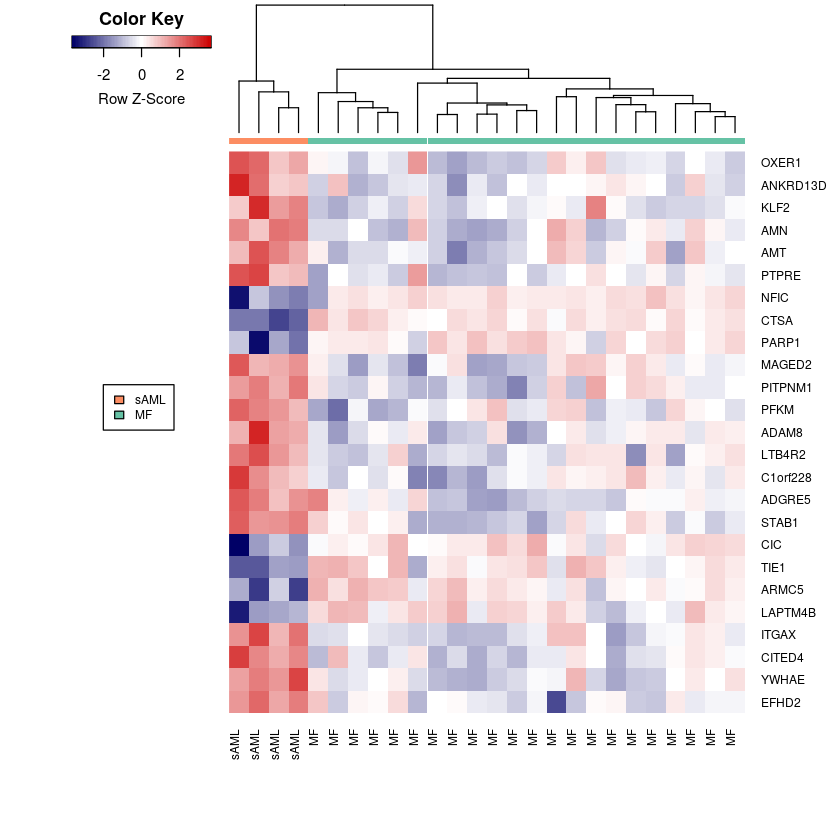

In [30]:
samples.tmp <- x.AML.MF.PB$sample$Sample.type3
table(samples.tmp)
samples.AML.MF.PB <- as.factor(samples.tmp)

celltypes.AML.MF.PB <- as.factor(as.character(x.AML.MF.PB$sample$CellType))
sex.AML.MF.PB <- as.factor(as.character(x.AML.MF.PB$sample$Sex))
newdesign.AML.MF.PB <- model.matrix(~0 + sex.AML.MF.PB + 
                                    celltypes.AML.MF.PB + samples.AML.MF.PB)
colnames(newdesign.AML.MF.PB) <- c("SexM", "SexF","CellType", "sAML - MF")
design.AML.MF.PB <- model.matrix(~0 + celltypes.AML.MF.PB + samples.AML.MF.PB)
colnames(design.AML.MF.PB) <- c("CellType1","CellType2", "sAML - MF")

v.AML.MF.PB <- voom(x.AML.MF.PB, design.AML.MF.PB, plot=FALSE)
vfit.AML.MF.PB <- lmFit(v.AML.MF.PB,design.AML.MF.PB)
efit.AML.MF.PB <- eBayes(vfit.AML.MF.PB)
dt.AML.MF.PB <- decideTests(efit.AML.MF.PB)
topTable.AML.MF.PB <- topTreat(efit.AML.MF.PB, coef=3, n=Inf, sort.by="p")

topgenes.AML.MF.PB <- row.names(topTable.AML.MF.PB)[1:25]
k.AML.MF.PB <- which(row.names(x.AML.MF.PB$counts) %in% topgenes.AML.MF.PB)
logCPM.AML.MF.PB <- cpm(x.AML.MF.PB, log=TRUE)
group.AML.MF.PB <- as.factor(x.AML.MF.PB$samples$Sample.type)
col.samp.AML.MF.PB <- samp.type.AML.MF.PB <- as.factor(x.AML.MF.PB$samples$Sample.type3)
levels(col.samp.AML.MF.PB) <-  brewer.pal(8, "Set2") 
col.samp.AML.MF.PB <- as.character(col.samp.AML.MF.PB)

mycol <- colorpanel(100,"#000066","white","#CC0000")

v.AML.MF.PB.new <- voom(x.AML.MF.PB, newdesign.AML.MF.PB, plot=FALSE)
vfit.AML.MF.PB.new <- lmFit(v.AML.MF.PB.new, newdesign.AML.MF.PB)
efit.AML.MF.PB.new <- eBayes(vfit.AML.MF.PB.new)
dt.AML.MF.PB.new <- decideTests(efit.AML.MF.PB.new)
topTable.AML.MF.PB.new <- topTreat(efit.AML.MF.PB.new, coef=4, n=Inf, sort.by="p")

topgenes.AML.MF.PB.new <- row.names(topTable.AML.MF.PB.new)[1:25]
k.AML.MF.PB.new <- which(row.names(x.AML.MF.PB$counts) %in% topgenes.AML.MF.PB.new)
group.AML.MF.PB.new <- as.factor(x.AML.MF.PB$samples$Sample.type3)

mycol <- colorpanel(100,"#000066","white","#CC0000")
#pdf(file="Holm_Jamieson_sAMLvMF_Prog_LimmaFactorCellType_DEGenes_Heatmap_03102020.pdf", width=7, height=9)
heatmap.2(logCPM.AML.MF.PB[k.AML.MF.PB.new,], scale="row",
    labRow=x.AML.MF.PB$genes$SYMBOL[k.AML.MF.PB], labCol=x.AML.MF.PB$samples$Sample.type3,  
col=mycol, trace="none", density.info="none", ColSideColors=col.samp.AML.MF.PB, key=T,
margin=c(8,6), lhei=c(2,10), dendrogram="column")

legend("left", fill = unique(col.samp.AML.MF.PB),
legend = unique(group.AML.MF.PB.new), inset=c(0,0), cex=.6)
#dev.off()

## Supplemental Figure S3A
### Venn Diagram of Differentially Expressed Genes Across Comparisons in Progenitor Cells

In [51]:
vennInput_withAML <- matrix(nrow = nrow(geneCount_coding.ABM.MF.PB), ncol=4, data = 0)
rownames(vennInput_withAML) <- rownames(geneCount_coding.ABM.MF.PB)

vennInput_withAML[which(rownames(vennInput_withAML) %in% rownames(dt.ABM.PV.PB)),1] <- dt.ABM.PV.PB[match(
                                            rownames(vennInput_withAML)[which(rownames(vennInput_withAML) %in% rownames(dt.ABM.PV.PB))], 
                                            rownames(dt.ABM.PV.PB)),1]
vennInput_withAML[which(rownames(vennInput_withAML) %in% rownames(dt.ABM.ET.PB)),2] <- dt.ABM.ET.PB[match(
                                            rownames(vennInput_withAML)[which(rownames(vennInput_withAML) %in% rownames(dt.ABM.ET.PB))],
                                            rownames(dt.ABM.ET.PB)),1]
vennInput_withAML[which(rownames(vennInput_withAML) %in% rownames(dt.ABM.MF.PB)),3] <- dt.ABM.MF.PB[match(
                                            rownames(vennInput_withAML)[which(rownames(vennInput_withAML) %in% rownames(dt.ABM.MF.PB))], 
                                            rownames(dt.ABM.MF.PB)),1]
vennInput_withAML[which(rownames(vennInput_withAML) %in% rownames(dt.ABM.sAML.PB)),4] <- dt.ABM.sAML.PB[match(
                                            rownames(vennInput_withAML)[which(rownames(vennInput_withAML) %in% rownames(dt.ABM.sAML.PB))], 
                                            rownames(dt.ABM.sAML.PB)),1]
colnames(vennInput_withAML) <- c("PV - Bone Marrow Control",
                         "ET- Bone Marrow Control",
                         "MF - Bone Marrow Control",
                         "sAML - Bone Marrow Control"
                        )

pdf("vennDiagram_AgedBMvsPV_ET_MF_CML_sAML_Prog_Holm_Jamieson_03102020.pdf", width=7, height=7)
vennDiagram(vennInput_withAML,circle.col=c('red','blue','green', 'gray', "dark orange"), cex=0.75,
           show.include = FALSE, main="Progenitor Cell RNASeq - Differentially Expressed Genes ")
#
dev.off()

png 
  2